# Merchant Level

By: Mohamed Fawzy

In [1249]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, Normalizer
from category_encoders import BinaryEncoder, OrdinalEncoder, TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.exceptions import NotFittedError

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.compose import ColumnTransformer

from sklearn.metrics import get_scorer_names, make_scorer, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

import joblib

In [1250]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Set the figure size for all plots
sns.set(rc={'figure.figsize':(14, 10)}, font_scale=1.2)

In [1251]:
# Read the dataset
df = pd.read_csv('Merchant Level.csv')

### Describing Data:

In [1252]:
df.head()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0


In [1253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


In [1254]:
for col in df.columns:
    print(f'Unique values for ({col}): {len(df[col].unique())}')

Unique values for (Trx_Rank): 17
Unique values for (Points): 5911
Unique values for (Trx_Vlu): 5911
Unique values for (Trx_Age): 573
Unique values for (Customer_Age): 527
Unique values for (Category In English): 7
Unique values for (User_Id): 33457
Unique values for (Mer_Id): 56


In [1255]:
df.describe()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,User_Id,Mer_Id
count,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000
mean,1.265227,3312.249748,331.224975,185.186664,144.027844,17173.411889,16.277111
std,0.776549,5756.374137,575.637414,121.989540,114.764448,9665.399084,16.099288
min,1.000000,20.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1220.000000,122.000000,62.000000,34.000000,8710.750000,8.000000
50%,1.000000,1893.500000,189.350000,203.000000,115.000000,17561.000000,8.000000
75%,1.000000,3100.000000,310.000000,271.000000,252.000000,25634.250000,26.000000
max,17.000000,263800.000000,26380.000000,698.000000,682.000000,33518.000000,56.000000


### Data Exploration:

In [1256]:
df['Trx_Rank'].value_counts()

1     36348
2      5079
3      1301
4       497
5       200
6       101
7        57
8        33
9        21
10       13
11       10
12        6
13        2
14        1
15        1
16        1
17        1
Name: Trx_Rank, dtype: int64

In [1257]:
df['Points'].value_counts()

2000     543
1000     388
1400     361
1600     355
1500     353
        ... 
7792       1
10060      1
8999       1
7332       1
1954       1
Name: Points, Length: 5911, dtype: int64

In [1258]:
df['Trx_Vlu'].value_counts()

200.0     543
100.0     388
140.0     361
160.0     355
150.0     353
         ... 
779.2       1
1006.0      1
899.9       1
733.2       1
195.4       1
Name: Trx_Vlu, Length: 5911, dtype: int64

In [1259]:
df['Trx_Age'].value_counts()

20     1318
27     1140
34     1111
41      742
250     553
       ... 
647       1
655       1
641       1
593       1
521       1
Name: Trx_Age, Length: 573, dtype: int64

In [1260]:
df['Customer_Age'].value_counts()

20     2093
27     1761
34     1727
41     1204
13      693
       ... 
557       1
569       1
502       1
473       1
464       1
Name: Customer_Age, Length: 527, dtype: int64

In [1261]:
df['Category In English'].value_counts()

Grocery            30694
F&B                 7720
Fashion             3333
Health & Beauty     1504
Electronics          228
Transportaion        146
Other                 47
Name: Category In English, dtype: int64

In [1262]:
df['User_Id'].value_counts()

19390    29
13519    19
1238     19
4360     18
6573     17
         ..
7664      1
7661      1
7659      1
7657      1
16532     1
Name: User_Id, Length: 33457, dtype: int64

In [1263]:
df['Mer_Id'].value_counts()

8     19361
3      6896
54     4269
7      3387
29     2963
26     1470
33     1302
40     1012
13      907
22      553
47      311
9       157
4       146
35      134
46      133
43      104
37       88
52       47
28       43
55       41
44       38
11       36
12       35
31       31
25       25
51       20
17       19
2        16
18       14
19       12
21       12
1        11
38       10
16        8
23        6
6         6
0         5
53        4
49        4
36        3
39        3
5         3
15        3
24        3
42        3
45        2
27        2
48        2
32        2
50        2
20        2
56        2
30        1
41        1
14        1
34        1
Name: Mer_Id, dtype: int64

In [1264]:
df['User_Id'].unique()

array([21053, 26472, 27075, ..., 27128, 28814, 29107], dtype=int64)

In [1265]:
df['Mer_Id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56], dtype=int64)

### Data Preprocessing:

- Check for duplicate rows

In [1266]:
# Check for duplicates
df.duplicated().sum()

0

In [1267]:
# Drop duplicates
df.drop_duplicates(inplace=True)

- Check for rows with missing values

In [1268]:
# Check for missing values
df.isnull().sum()

Trx_Rank               0
Points                 0
Trx_Vlu                0
Trx_Age                0
Customer_Age           0
Category In English    0
User_Id                0
Mer_Id                 0
dtype: int64

In [1269]:
# Define a function to calculate the percentage of missing values
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Apply the function
missing_values(df)

,Total,Percent
Trx_Rank,0,0.0
Points,0,0.0
Trx_Vlu,0,0.0
Trx_Age,0,0.0
Customer_Age,0,0.0
Category In English,0,0.0
User_Id,0,0.0
Mer_Id,0,0.0


- Validate if `Trx_Vlu` and `Points` are equivalent

In [1270]:
# Check if Trx_Vlu is equal to Points/10
df['Trx_Vlu'].equals(df['Points']/10)

True

In [1271]:
# Check if Trx_Vlu is equal to Points/10
df[df['Trx_Vlu'] == df['Points']/10]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,55
43668,1,3120,312.0,31,31,F&B,27128,55
43669,1,1200,120.0,25,25,F&B,28814,55
43670,1,20,2.0,2,2,Other,29107,56


- Validate if `Customer_Age` and min of `Trx_Age` are equivalent

In [1272]:
# Check if Customer_Age is equal to the min of Trx_Age for each user
df[df['Customer_Age'] != df.groupby('User_Id')['Trx_Age'].transform('min')].sort_values(by=['User_Id', 'Trx_Age', 'Mer_Id'])

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
36134,1,20,2.0,50,30,Fashion,7721,32
36135,2,20,2.0,50,30,Fashion,7721,32
2409,2,20,2.0,15,1,Grocery,11414,3
31031,2,20,2.0,16,1,Other,11414,21
8154,1,20,2.0,30,1,F&B,11414,7
31216,2,20,2.0,30,1,F&B,11414,22
39053,1,20,2.0,30,1,Fashion,11414,47
31215,1,20,2.0,32,1,F&B,11414,22
34223,2,20,2.0,59,1,Fashion,11414,29
17016,1,20,2.0,108,1,Grocery,11414,8


In [1273]:
# Define a function to replace Customer_Age value with the min of Trx_Age for each user
def replace_customer_age(df):
    df['Customer_Age'] = df.groupby('User_Id')['Trx_Age'].transform('min')
    return df

# Apply the function
df = replace_customer_age(df)

In [1274]:
# Check if Customer_Age is equal to the min of Trx_Age for each user
df[df['Customer_Age'] == df.groupby('User_Id')['Trx_Age'].transform('min')]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,55
43668,1,3120,312.0,31,31,F&B,27128,55
43669,1,1200,120.0,25,25,F&B,28814,55
43670,1,20,2.0,2,2,Other,29107,56


- Check if `Mer_Id` is in one `Category In English` or more

In [1275]:
# Show the Mer_Id in each Category In English in a dataframe
df.groupby('Category In English')['Mer_Id'].unique().explode().to_frame()

,Mer_Id
Category In English,
Electronics,5
Electronics,25
Electronics,28
Electronics,46
Electronics,48
Electronics,50
Electronics,51
F&B,1
F&B,7


In [1276]:
# Make a pivot table for the Category In English, Mer_Id and sum of Trx_Vlu
df.pivot_table(index='Mer_Id', columns='Category In English', values='Trx_Vlu', aggfunc='sum')

Category In English,Electronics,F&B,Fashion,Grocery,Health & Beauty,Other,Transportaion
Mer_Id,,,,,,,
0,NaN,NaN,4422.0,NaN,NaN,NaN,NaN
1,NaN,6156.4,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,6510.0,NaN
3,NaN,NaN,NaN,1890935.6,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,53427.3
5,1044.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1100.0,NaN,NaN
7,NaN,866358.8,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,6490844.5,NaN,NaN,NaN


### Feature Engineering:

- Check if the user is active

In [1277]:
# Show the high active users relative to Trx_Rank
df[df['Trx_Rank'] >= 8]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
956,8,2600,260.0,36,36,Grocery,4865,3
7188,8,6780,678.0,309,9,F&B,1238,7
7189,9,5395,539.5,252,9,F&B,1238,7
7190,10,6160,616.0,246,9,F&B,1238,7
7191,11,3440,344.0,120,9,F&B,1238,7
...,...,...,...,...,...,...,...,...
40729,10,4010,401.0,110,27,Grocery,15868,54
40730,11,5405,540.5,89,27,Grocery,15868,54
40731,12,4508,450.8,27,27,Grocery,15868,54
41258,8,3098,309.8,173,173,Grocery,20391,54


In [1278]:
# Show the medium active users relative to Trx_Rank
df[(df['Trx_Rank'] >= 4) & (df['Trx_Rank'] < 8)]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
119,4,7000,700.0,68,20,Grocery,532,3
273,4,8360,836.0,153,153,Grocery,1515,3
696,4,2000,200.0,137,5,Grocery,3632,3
697,5,6000,600.0,108,5,Grocery,3632,3
770,4,1687,168.7,166,166,Grocery,3970,3
...,...,...,...,...,...,...,...,...
43454,6,640,64.0,73,73,Grocery,32264,54
43518,4,570,57.0,203,1,Grocery,32686,54
43519,5,2145,214.5,1,1,Grocery,32686,54
43575,4,1100,110.0,199,199,Grocery,33045,54


In [1279]:
# Show the low active users relative to Trx_Rank
df[df['Trx_Rank'] < 4]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,55
43668,1,3120,312.0,31,31,F&B,27128,55
43669,1,1200,120.0,25,25,F&B,28814,55
43670,1,20,2.0,2,2,Other,29107,56


In [1280]:
# Define a function to create a new column for the active user/merchant
def active_user_merchant(df):
    df['Active_User_Merchant'] = df['Trx_Rank'].apply(lambda x: 'High' if x >= 8 else 'Medium' if (x >= 4) & (x < 8) else 'Low')
    return df

# Apply the function
df = active_user_merchant(df)

In [1281]:
# Show the high active users relative to Customer_Age
df[df['Customer_Age'] <= 60]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Active_User_Merchant
3,1,1980,198.0,558,34,Fashion,27075,0,Low
5,1,16740,1674.0,34,34,F&B,1447,1,Low
6,1,5820,582.0,33,33,F&B,2709,1,Low
8,1,1565,156.5,14,14,F&B,7026,1,Low
9,1,4165,416.5,27,27,F&B,10231,1,Low
...,...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,55,Low
43668,1,3120,312.0,31,31,F&B,27128,55,Low
43669,1,1200,120.0,25,25,F&B,28814,55,Low
43670,1,20,2.0,2,2,Other,29107,56,Low


In [1282]:
# Show the medium active users relative to Customer_Age
df[(df['Customer_Age'] > 60) & (df['Customer_Age'] <= 180)]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Active_User_Merchant
15,1,2000,200.0,102,102,F&B,31199,1,Low
39,1,2920,292.0,111,111,Grocery,60,3,Low
47,1,5582,558.2,111,111,Grocery,97,3,Low
48,1,1756,175.6,168,168,Grocery,100,3,Low
50,1,1500,150.0,305,63,Grocery,112,3,Low
...,...,...,...,...,...,...,...,...,...
43614,1,1115,111.5,344,78,Grocery,33375,54,Low
43615,2,780,78.0,78,78,Grocery,33375,54,Low
43617,1,720,72.0,143,143,Grocery,33386,54,Low
43623,1,2169,216.9,158,158,Grocery,33411,54,Low


In [1283]:
# Show the low active users relative to Customer_Age
df[(df['Customer_Age'] > 180) & (df['Customer_Age'] <= 365)]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Active_User_Merchant
0,1,20140,2014.0,362,362,Fashion,21053,0,Low
7,1,4724,472.4,233,233,F&B,3303,1,Low
17,1,4000,400.0,306,306,Other,7039,2,Low
18,1,1200,120.0,503,257,Other,10038,2,Low
19,2,2680,268.0,419,257,Other,10038,2,Low
...,...,...,...,...,...,...,...,...,...
43612,1,700,70.0,455,290,Grocery,33373,54,Low
43613,2,698,69.8,290,290,Grocery,33373,54,Low
43616,1,1080,108.0,205,205,Grocery,33381,54,Low
43626,1,21320,2132.0,357,357,Grocery,33498,54,Low


In [1284]:
# Show the very low active users relative to Customer_Age
df[df['Customer_Age'] > 365]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Active_User_Merchant
1,1,11200,1120.0,371,368,Fashion,26472,0,Low
2,2,8500,850.0,368,368,Fashion,26472,0,Low
4,1,2400,240.0,413,413,Fashion,27417,0,Low
16,1,1400,140.0,419,419,Other,4594,2,Low
6980,1,1380,138.0,391,391,Transportaion,16373,4,Low
...,...,...,...,...,...,...,...,...,...
43579,1,1791,179.1,409,409,Grocery,33075,54,Low
43583,1,1180,118.0,388,388,Grocery,33100,54,Low
43608,1,1074,107.4,380,380,Grocery,33339,54,Low
43611,1,2291,229.1,376,376,Grocery,33351,54,Low


In [1285]:
# Define a function to create a new column for the active user/age
def active_user_age(df):
    df['Active_User_Age'] = df['Customer_Age'].apply(lambda x: 'High' if x <= 60 else 'Medium' if (x > 60) & (x <= 180) else 'Low' if (x > 180) & (x <= 365) else 'Very Low')
    return df

# Apply the function
df = active_user_age(df)

### EDA Results:

In [1286]:
# Show the sum of Trx_Vlu for each Category In English
df.groupby('Category In English')['Trx_Vlu'].sum().sort_values(ascending=False).to_frame()

,Trx_Vlu
Category In English,
Grocery,9918361.1
F&B,2304417.9
Fashion,1497675.6
Health & Beauty,374330.1
Electronics,297591.2
Transportaion,53427.3
Other,19453.9


In [1287]:
# Show the average of Trx_Vlu for each Category In English
df.groupby('Category In English')['Trx_Vlu'].mean().sort_values(ascending=False).to_frame()

,Trx_Vlu
Category In English,
Electronics,1305.224561
Fashion,449.347615
Other,413.912766
Transportaion,365.940411
Grocery,323.136805
F&B,298.499728
Health & Beauty,248.889694


In [1288]:
# Show the sum of Trx_Vlu for each Mer_Id
df.groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).to_frame()

,Trx_Vlu
Mer_Id,
8,6490844.5
3,1890935.6
54,1511945.1
29,1281993.6
7,866358.8
13,433570.1
26,356161.1
40,290036.6
33,287080.4


In [1289]:
# Show the average of Trx_Vlu for each Mer_Id
df.groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).to_frame()

,Trx_Vlu
Mer_Id,
28,3600.439535
39,946.000000
46,939.805263
0,884.400000
44,843.784211
20,720.000000
43,685.530769
47,621.318328
18,585.928571


<Axes: xlabel='Trx_Rank', ylabel='count'>

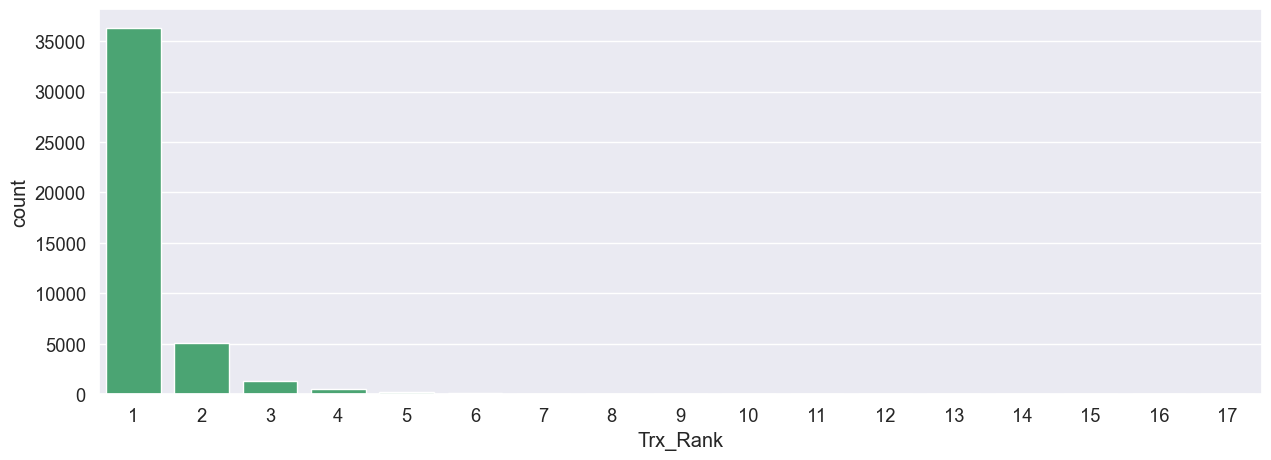

In [1290]:
# Show the distribution of Trx_Rank
plt.figure(figsize=(15, 5))
sns.countplot(x='Trx_Rank', data=df, color='mediumseagreen', order=df['Trx_Rank'].value_counts().index)

<Axes: xlabel='Trx_Vlu', ylabel='Count'>

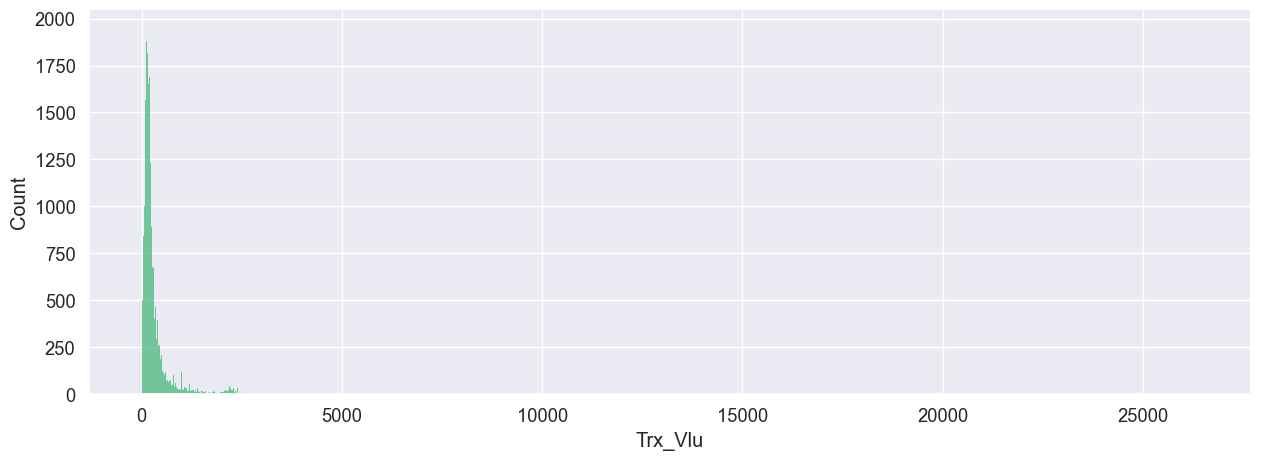

In [1291]:
# Show the distribution of Trx_Vlu
plt.figure(figsize=(15, 5))
sns.histplot(x='Trx_Vlu', data=df, color='mediumseagreen')

<Axes: xlabel='Trx_Age', ylabel='Count'>

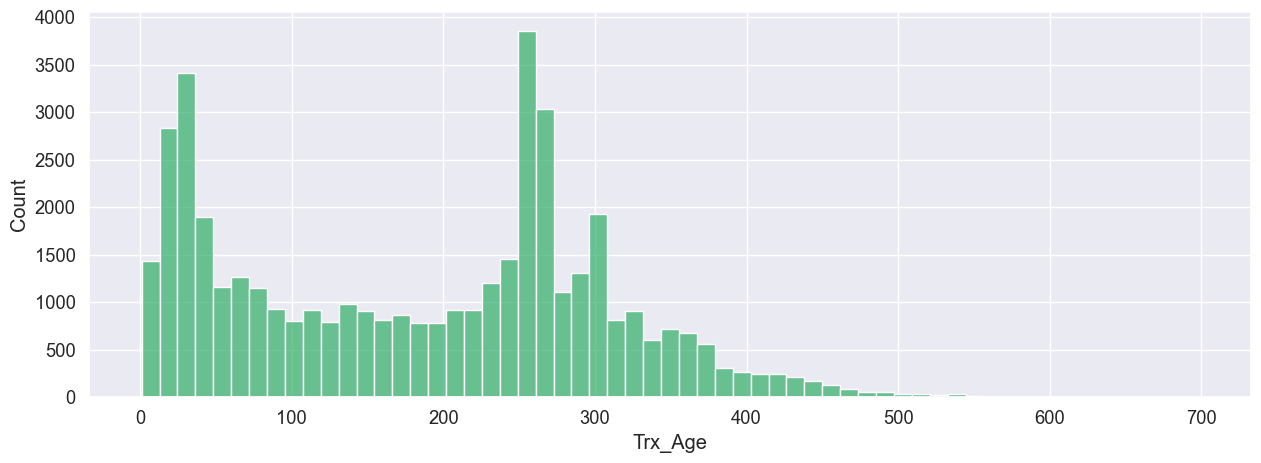

In [1292]:
# Show the distribution of Trx_Age
plt.figure(figsize=(15, 5))
sns.histplot(x='Trx_Age', data=df, color='mediumseagreen')

<Axes: xlabel='Customer_Age', ylabel='Count'>

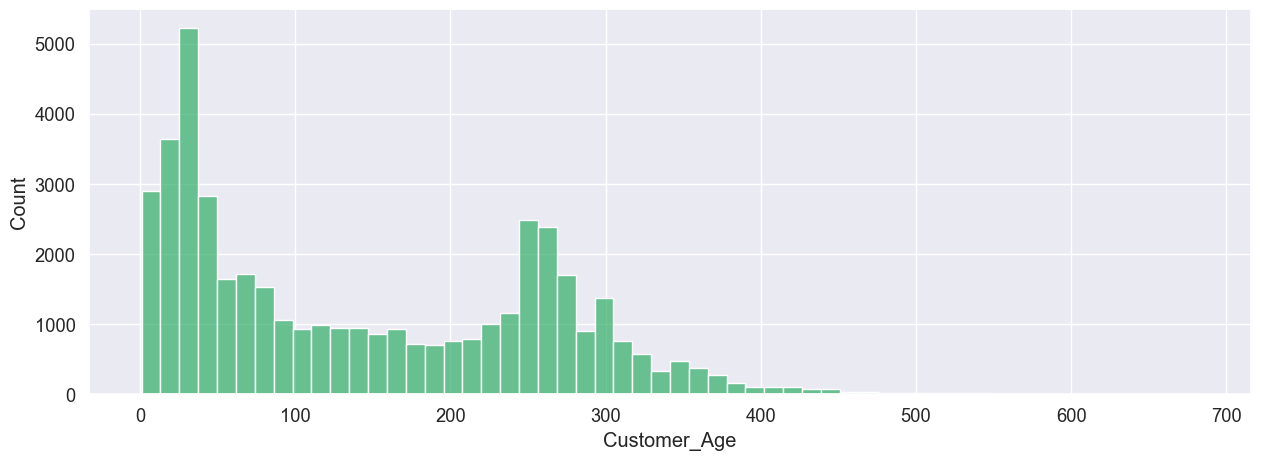

In [1293]:
# Show the distribution of Customer_Age
plt.figure(figsize=(15, 5))
sns.histplot(x='Customer_Age', data=df, color='mediumseagreen')

<Axes: xlabel='Category In English', ylabel='Trx_Vlu'>

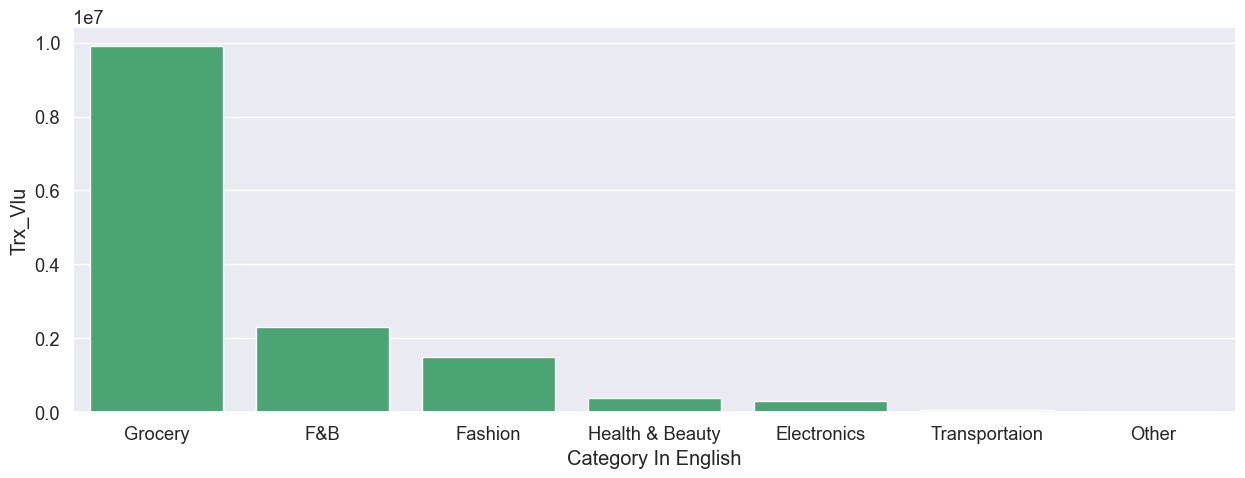

In [1294]:
# Show changes in sum of Trx_Vlu over the Category In English
plt.figure(figsize=(15, 5))
sns.barplot(x='Category In English', y='Trx_Vlu', data=df, estimator=sum, ci=None, color='mediumseagreen', order=df.groupby('Category In English')['Trx_Vlu'].sum().sort_values(ascending=False).index)

<Axes: xlabel='Category In English', ylabel='Trx_Vlu'>

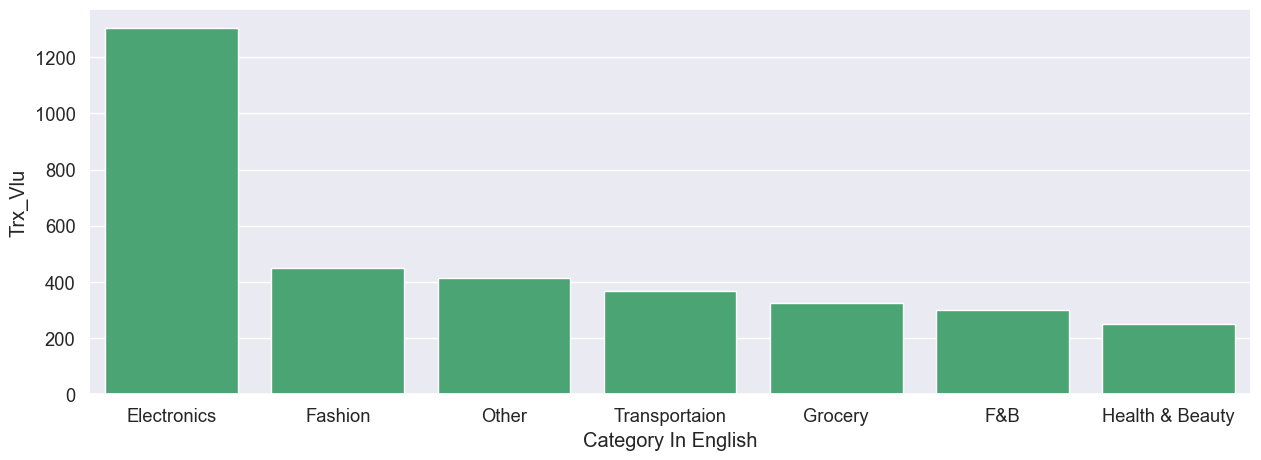

In [1295]:
# Show changes in average of Trx_Vlu over the Category In English
plt.figure(figsize=(15, 5))
sns.barplot(x='Category In English', y='Trx_Vlu', data=df, estimator=np.mean, ci=None, color='mediumseagreen', order=df.groupby('Category In English')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='User_Id', ylabel='Trx_Vlu'>

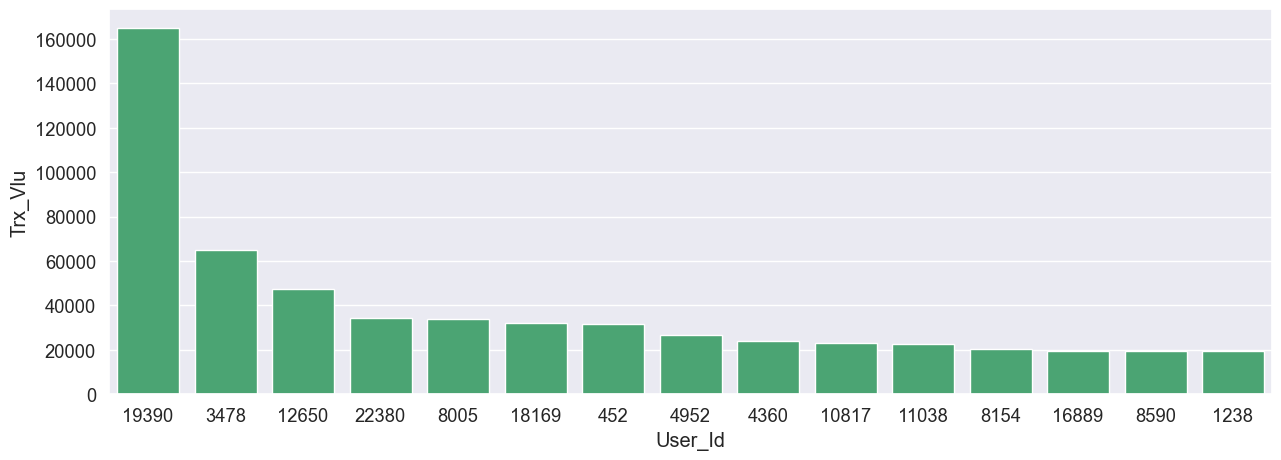

In [1296]:
# Show changes in sum of Trx_Vlu over the User_Id for the top 15 users
plt.figure(figsize=(15, 5))
sns.barplot(x='User_Id', y='Trx_Vlu', data=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)], estimator=sum, ci=None, color='mediumseagreen', order=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)].groupby('User_Id')['Trx_Vlu'].sum().sort_values(ascending=False).index)

<Axes: xlabel='User_Id', ylabel='Trx_Vlu'>

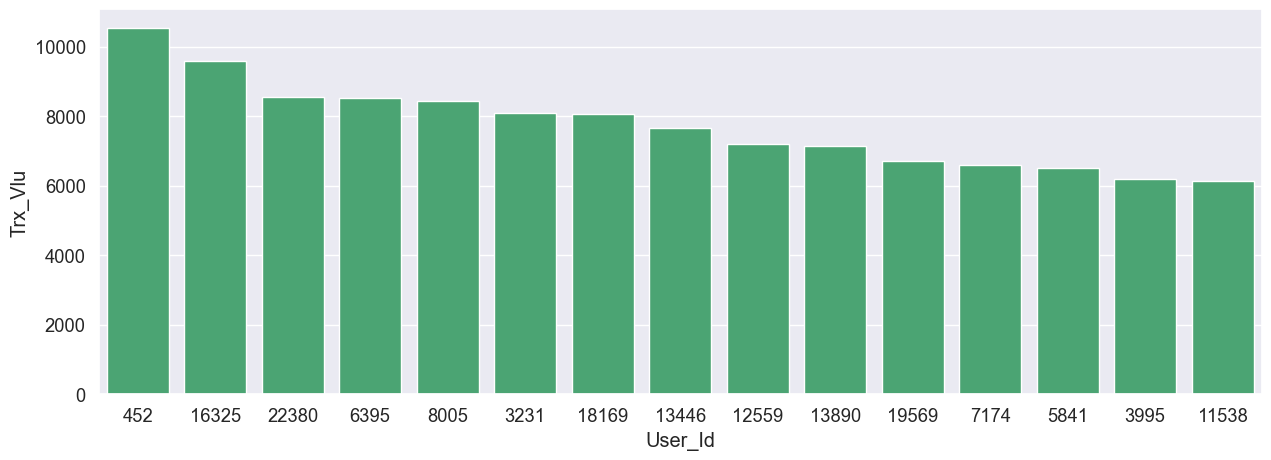

In [1297]:
# Show changes in average of Trx_Vlu over the User_Id for the top 15 users
plt.figure(figsize=(15, 5))
sns.barplot(x='User_Id', y='Trx_Vlu', data=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)], estimator=np.mean, ci=None, color='mediumseagreen', order=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)].groupby('User_Id')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Mer_Id', ylabel='Trx_Vlu'>

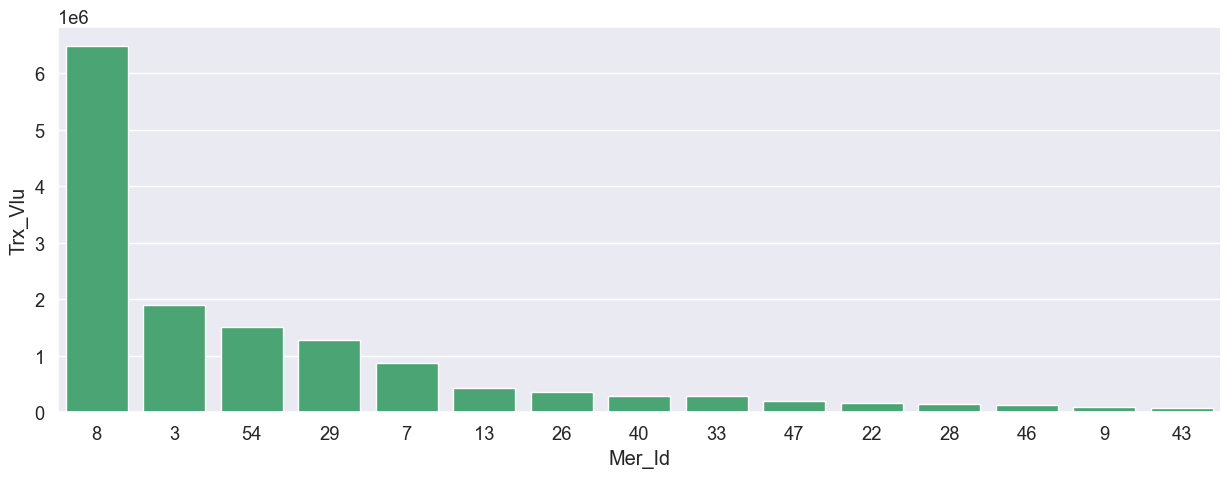

In [1298]:
# Show changes in sum of Trx_Vlu over the Mer_Id for the top 15 merchants
plt.figure(figsize=(15, 5))
sns.barplot(x='Mer_Id', y='Trx_Vlu', data=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)], estimator=sum, ci=None, color='mediumseagreen', order=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)].groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).index)

<Axes: xlabel='Mer_Id', ylabel='Trx_Vlu'>

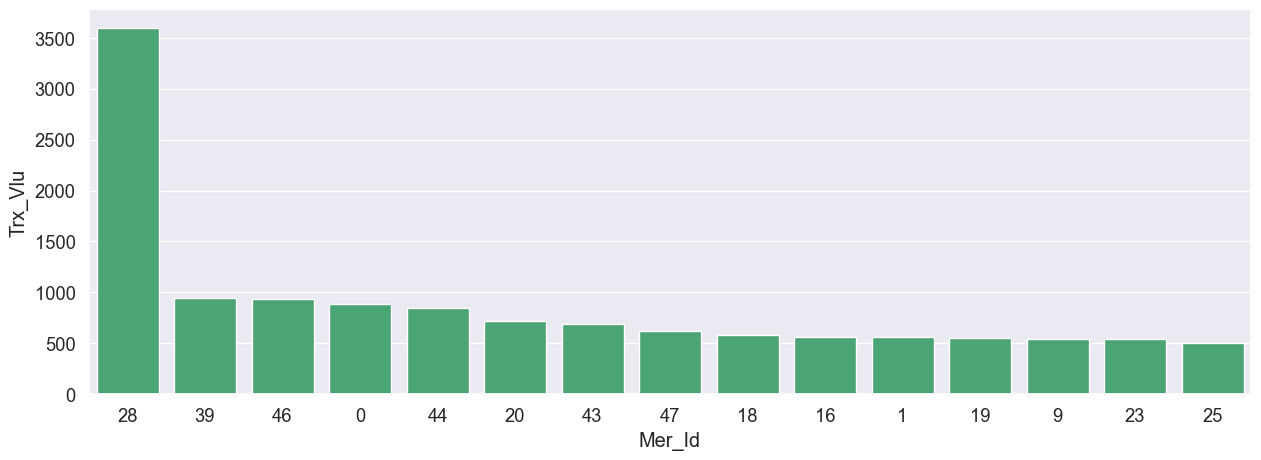

In [1299]:
# Show changes in average of Trx_Vlu over the Mer_Id for the top 15 merchants
plt.figure(figsize=(15, 5))
sns.barplot(x='Mer_Id', y='Trx_Vlu', data=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)], estimator=np.mean, ci=None, color='mediumseagreen', order=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)].groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Active_User_Merchant', ylabel='Trx_Vlu'>

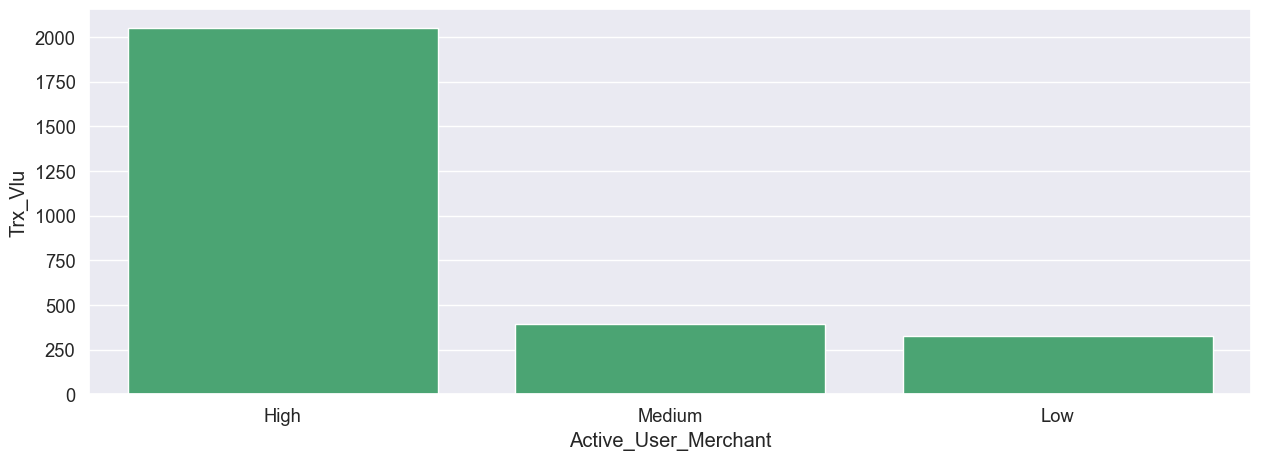

In [1300]:
# Show changes in average of Trx_Vlu over the Active_User_Merchant
plt.figure(figsize=(15, 5))
sns.barplot(x='Active_User_Merchant', y='Trx_Vlu', data=df, estimator=np.mean, ci=None, color='mediumseagreen', order=df.groupby('Active_User_Merchant')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Active_User_Age', ylabel='Trx_Vlu'>

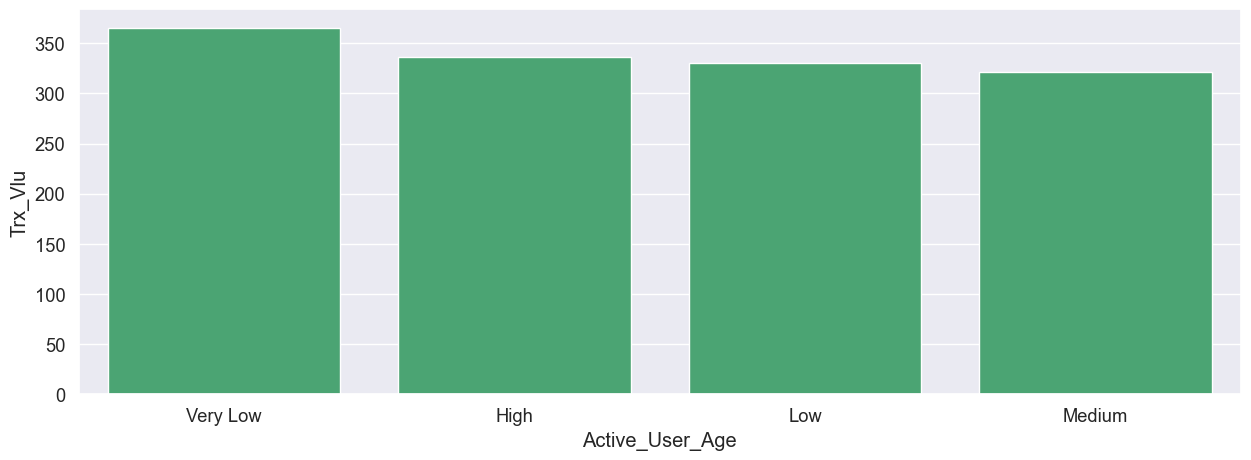

In [1301]:
# Show changes in average of Trx_Vlu over the Active_User_Age
plt.figure(figsize=(15, 5))
sns.barplot(x='Active_User_Age', y='Trx_Vlu', data=df, estimator=np.mean, ci=None, color='mediumseagreen', order=df.groupby('Active_User_Age')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Customer_Age', ylabel='Density'>

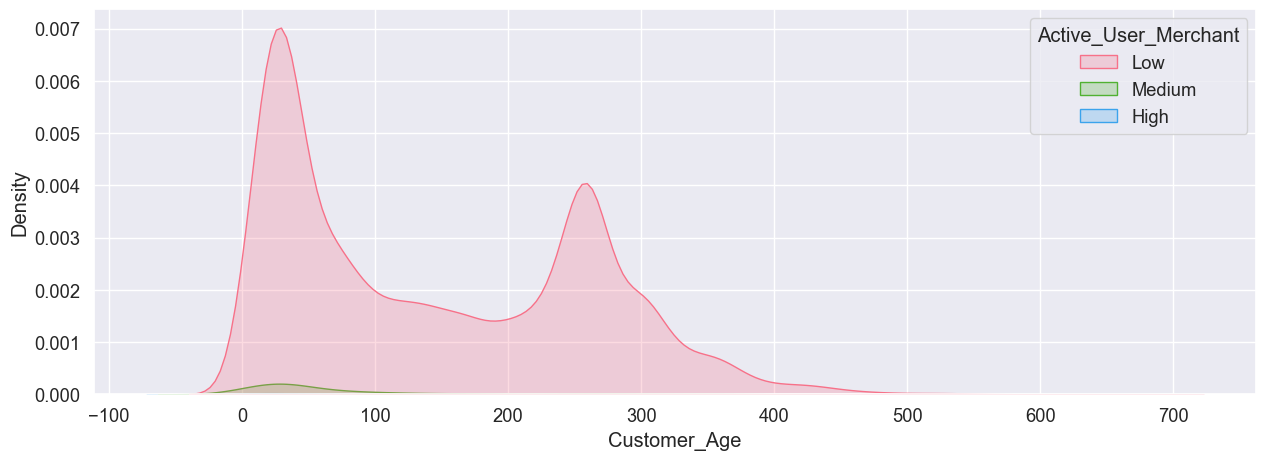

In [1302]:
# Show distribution of Customer_Age over the Active_User_Merchant
plt.figure(figsize=(15, 5)) 
sns.kdeplot(x='Customer_Age', hue='Active_User_Merchant', data=df, fill=True, palette='husl')

<Axes: xlabel='Customer_Age', ylabel='Density'>

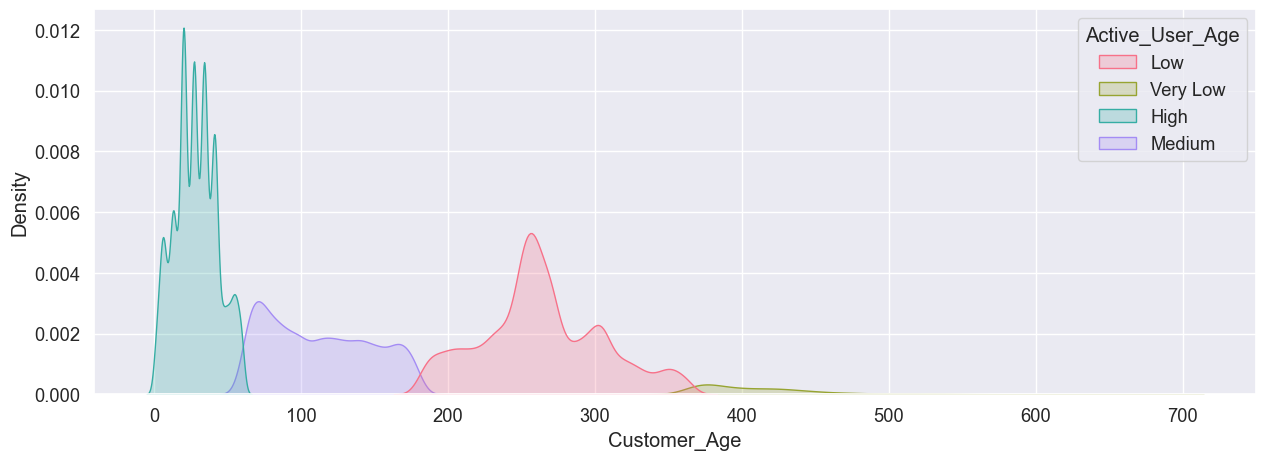

In [1303]:
# Show distribution of Customer_Age over the Active_User_Age
plt.figure(figsize=(15, 5)) 
sns.kdeplot(x='Customer_Age', hue='Active_User_Age', data=df, fill=True, palette='husl')

- Drop outliers in `Trx_Vlu`

In [1304]:
# Check if there is outliers in Trx_Vlu
df[df['Trx_Vlu'] > 5000]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Active_User_Merchant,Active_User_Age
3053,1,55177,5517.7,251,251,Grocery,13724,3,Low,Low
10716,1,51180,5118.0,251,41,Grocery,452,8,Low,High
10717,2,204460,20446.0,41,41,Grocery,452,8,Low,High
10738,1,54500,5450.0,27,27,Grocery,496,8,Low,High
12453,4,62340,6234.0,221,12,Grocery,3478,8,Medium,High
...,...,...,...,...,...,...,...,...,...,...
38838,1,60800,6080.0,277,41,Electronics,452,46,Low,High
38851,1,89000,8900.0,325,41,Electronics,4952,46,Low,High
38893,1,51670,5167.0,269,15,Electronics,13617,46,Low,High
38990,1,80940,8094.0,86,86,Fashion,3231,47,Low,Medium


In [1305]:
# Drop the outliers in Trx_Vlu
df.drop(df[df['Trx_Vlu'] > 5000].index, inplace=True)

In [1306]:
# Reset the index of the dataframe rows
df.reset_index(drop=True, inplace=True)

In [1307]:
# Show the sum of Trx_Vlu for each Category In English
df.groupby('Category In English')['Trx_Vlu'].sum().sort_values(ascending=False).to_frame()

,Trx_Vlu
Category In English,
Grocery,9514450.4
F&B,2293099.9
Fashion,1475890.6
Health & Beauty,374330.1
Electronics,144106.2
Transportaion,53427.3
Other,19453.9


In [1308]:
# Show the average of Trx_Vlu for each Category In English
df.groupby('Category In English')['Trx_Vlu'].mean().sort_values(ascending=False).to_frame()

,Trx_Vlu
Category In English,
Electronics,692.818269
Fashion,443.210390
Other,413.912766
Transportaion,365.940411
Grocery,310.402271
F&B,297.110637
Health & Beauty,248.889694


In [1309]:
# Show the sum of Trx_Vlu for each Mer_Id
df.groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).to_frame()

,Trx_Vlu
Mer_Id,
8,6098063.5
3,1885417.9
54,1506333.1
29,1268302.6
7,866358.8
13,427448.1
26,356161.1
40,290036.6
33,281884.4


In [1310]:
# Show the average of Trx_Vlu for each Mer_Id
df.groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).to_frame()

,Trx_Vlu
Mer_Id,
39,946.000000
0,884.400000
44,843.784211
28,826.188462
46,806.516154
20,720.000000
43,685.530769
47,597.212903
18,585.928571


<Axes: xlabel='Trx_Rank', ylabel='count'>

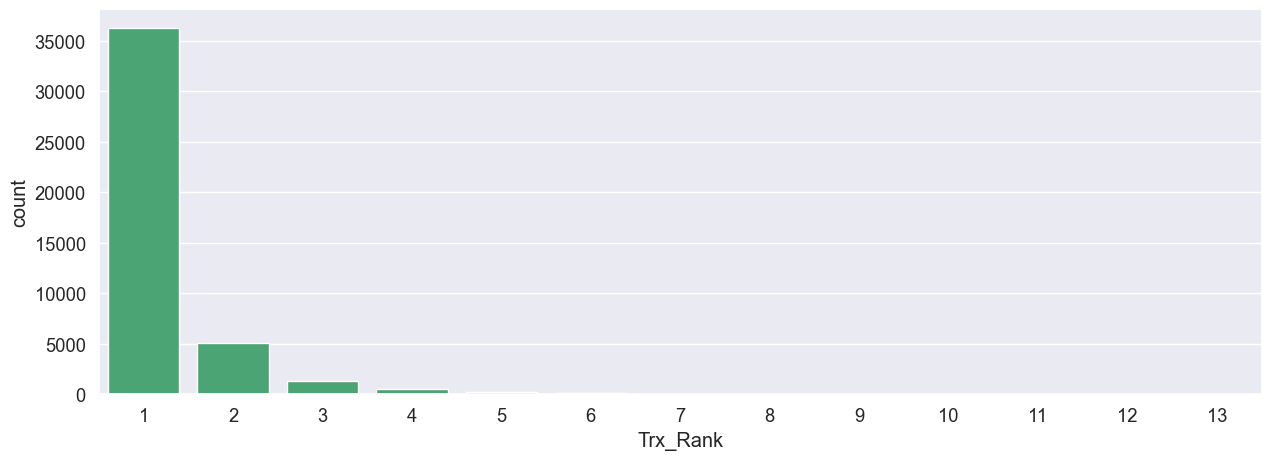

In [1311]:
# Show the distribution of Trx_Rank
plt.figure(figsize=(15, 5))
sns.countplot(x='Trx_Rank', data=df, color='mediumseagreen', order=df['Trx_Rank'].value_counts().index)

<Axes: xlabel='Trx_Vlu', ylabel='Count'>

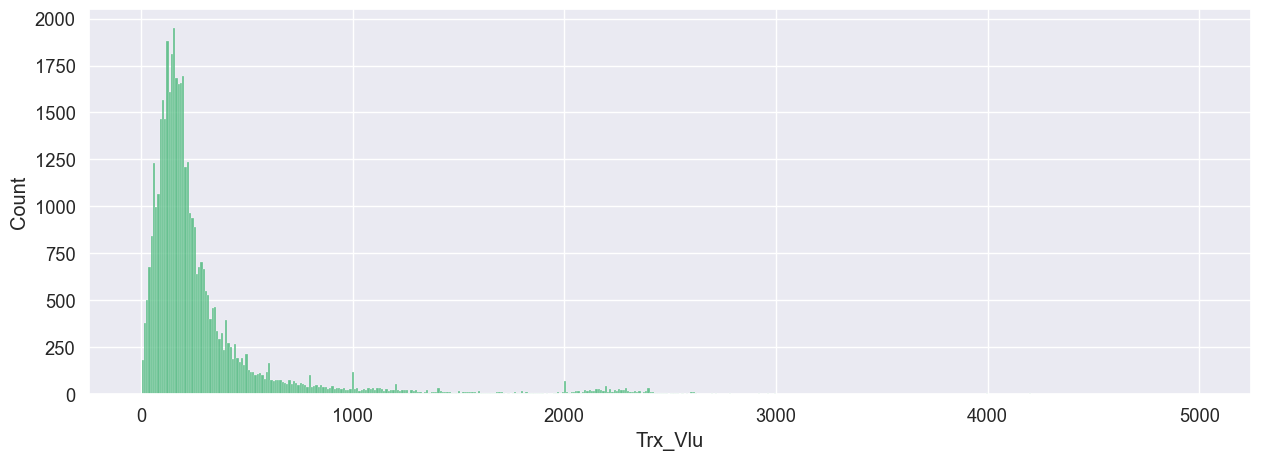

In [1312]:
# Show the distribution of Trx_Vlu
plt.figure(figsize=(15, 5))
sns.histplot(x='Trx_Vlu', data=df, color='mediumseagreen')

<Axes: xlabel='Trx_Age', ylabel='Count'>

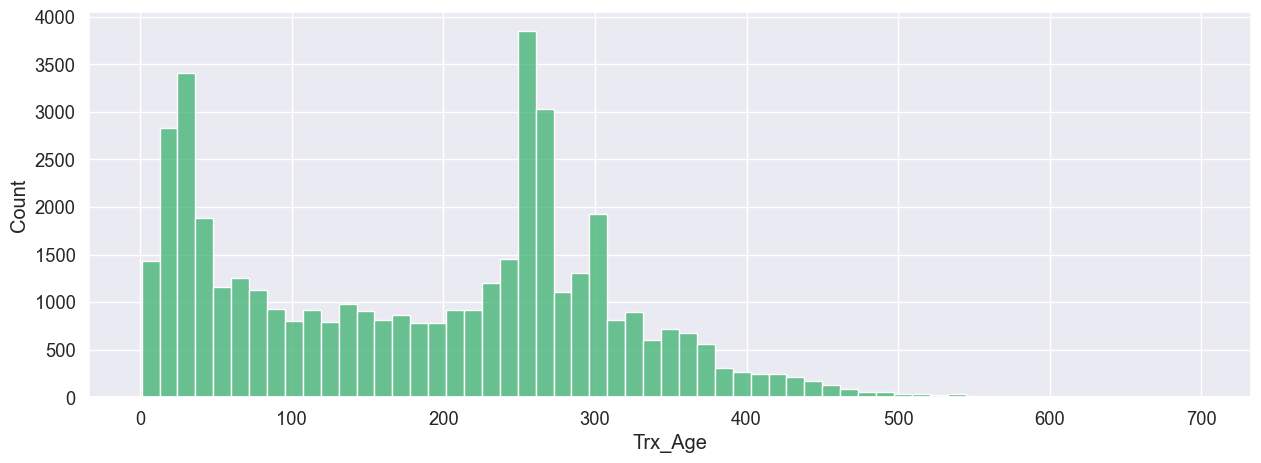

In [1313]:
# Show the distribution of Trx_Age
plt.figure(figsize=(15, 5))
sns.histplot(x='Trx_Age', data=df, color='mediumseagreen')

<Axes: xlabel='Customer_Age', ylabel='Count'>

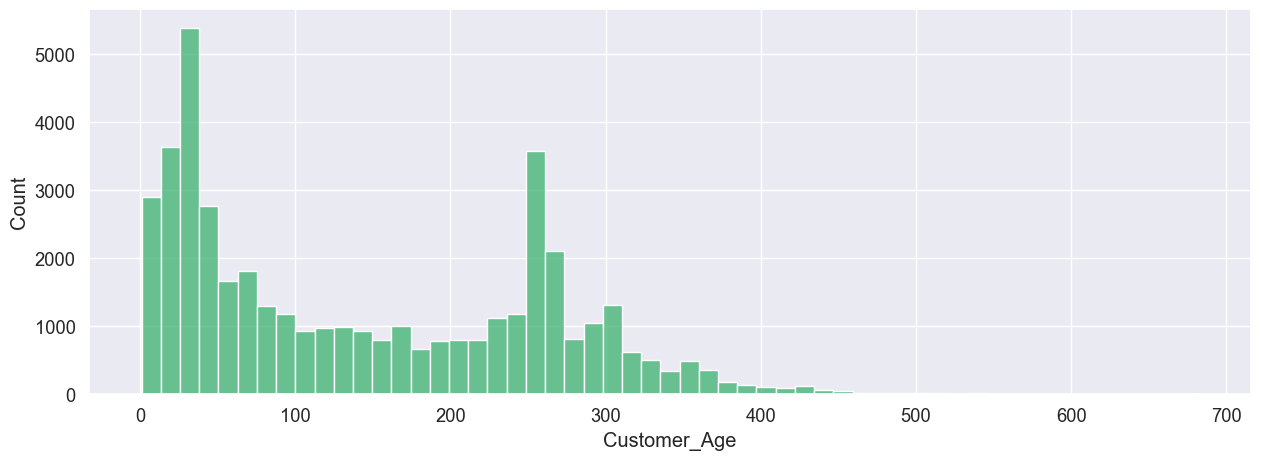

In [1314]:
# Show the distribution of Customer_Age
plt.figure(figsize=(15, 5))
sns.histplot(x='Customer_Age', data=df, color='mediumseagreen')

<Axes: xlabel='Category In English', ylabel='Trx_Vlu'>

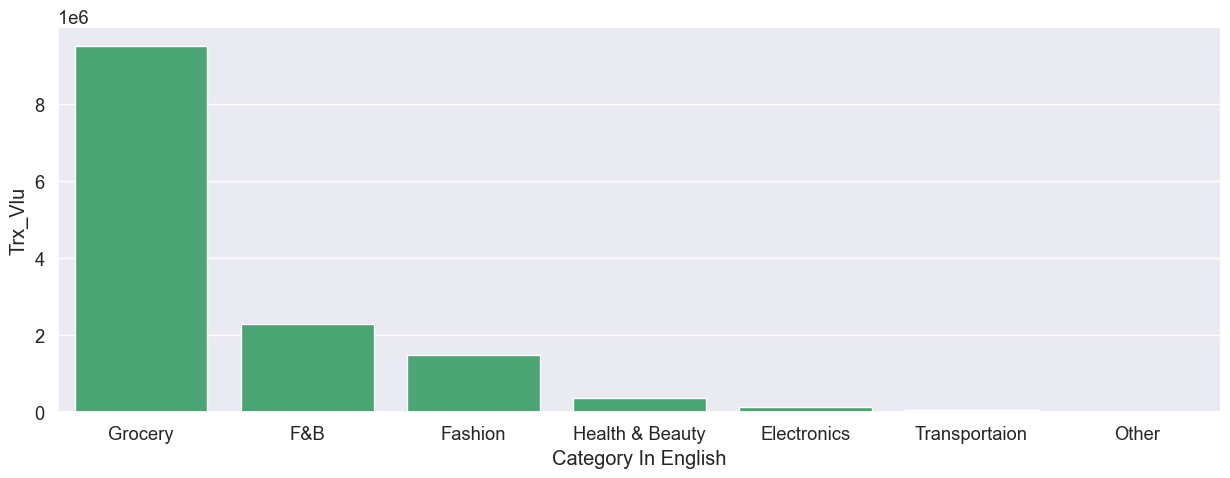

In [1315]:
# Show changes in sum of Trx_Vlu over the Category In English
plt.figure(figsize=(15, 5))
sns.barplot(x='Category In English', y='Trx_Vlu', data=df, estimator=sum, ci=None, color='mediumseagreen', order=df.groupby('Category In English')['Trx_Vlu'].sum().sort_values(ascending=False).index)

<Axes: xlabel='Category In English', ylabel='Trx_Vlu'>

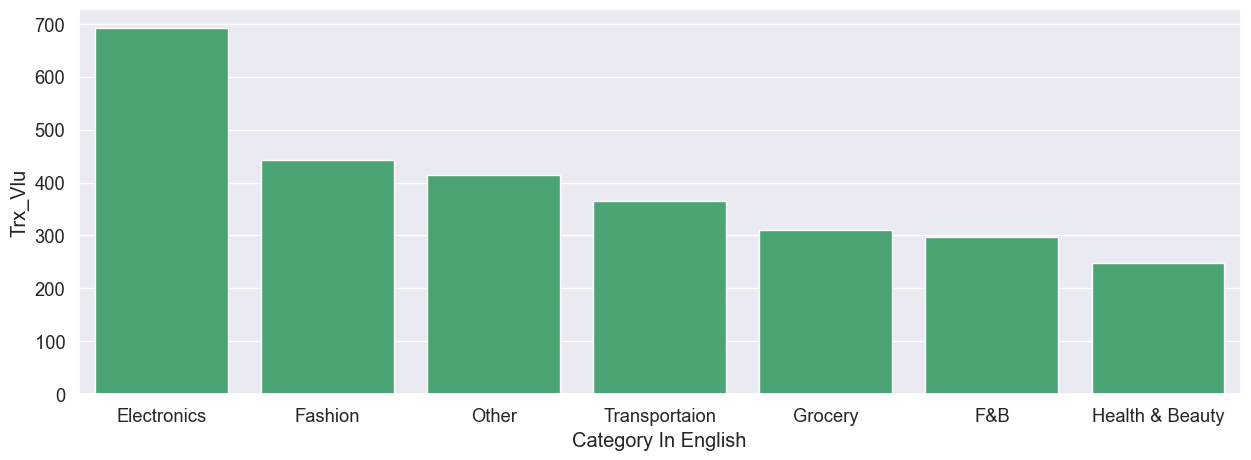

In [1316]:
# Show changes in average of Trx_Vlu over the Category In English
plt.figure(figsize=(15, 5))
sns.barplot(x='Category In English', y='Trx_Vlu', data=df, estimator=np.mean, ci=None, color='mediumseagreen', order=df.groupby('Category In English')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='User_Id', ylabel='Trx_Vlu'>

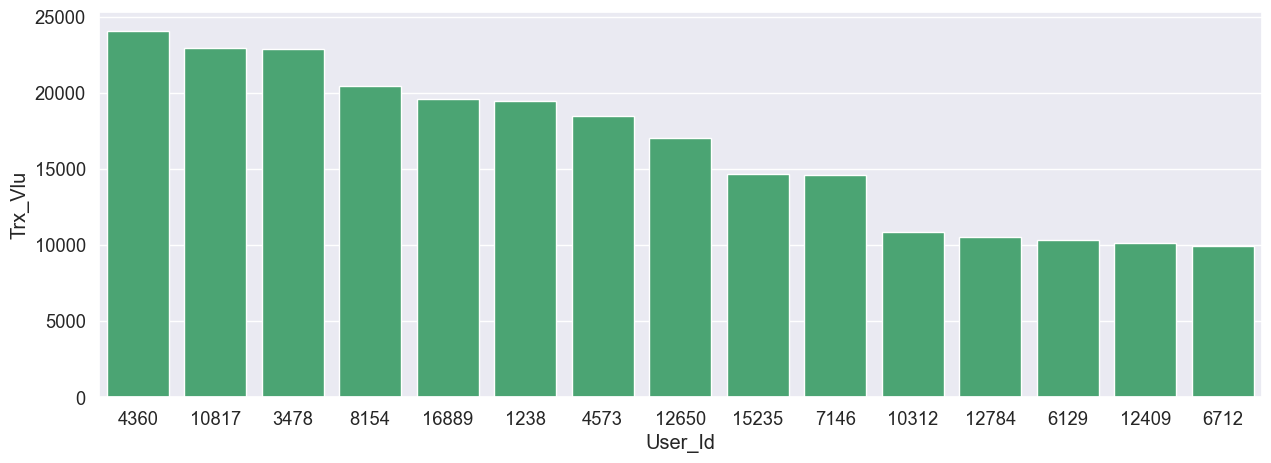

In [1317]:
# Show changes in sum of Trx_Vlu over the User_Id for the top 15 users
plt.figure(figsize=(15, 5))
sns.barplot(x='User_Id', y='Trx_Vlu', data=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)], estimator=sum, ci=None, color='mediumseagreen', order=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)].groupby('User_Id')['Trx_Vlu'].sum().sort_values(ascending=False).index)

<Axes: xlabel='User_Id', ylabel='Trx_Vlu'>

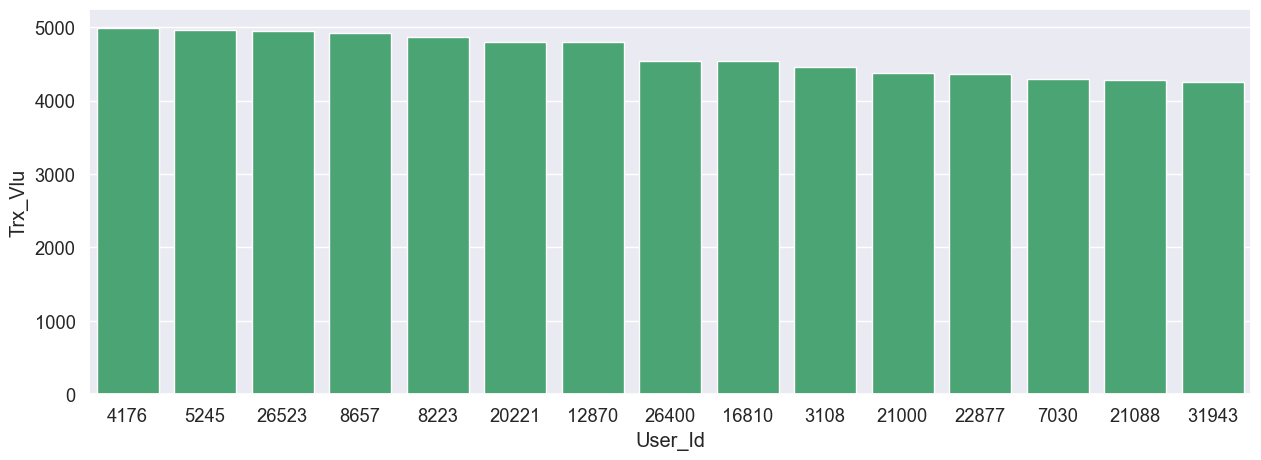

In [1318]:
# Show changes in average of Trx_Vlu over the User_Id for the top 15 users
plt.figure(figsize=(15, 5))
sns.barplot(x='User_Id', y='Trx_Vlu', data=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)], estimator=np.mean, ci=None, color='mediumseagreen', order=df[df['User_Id'].isin(df.groupby('User_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)].groupby('User_Id')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Mer_Id', ylabel='Trx_Vlu'>

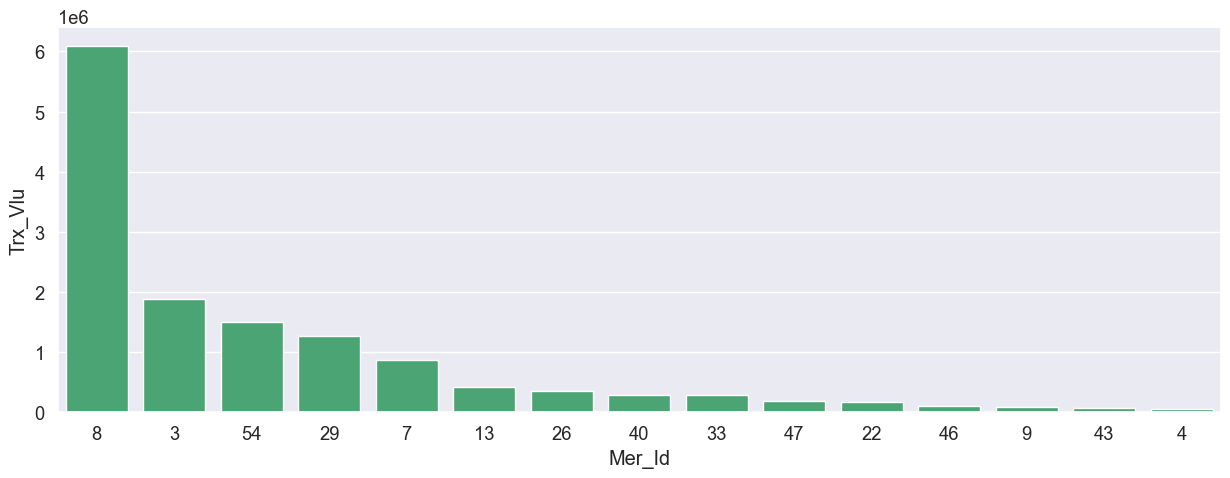

In [1319]:
# Show changes in sum of Trx_Vlu over the Mer_Id for the top 15 merchants
plt.figure(figsize=(15, 5))
sns.barplot(x='Mer_Id', y='Trx_Vlu', data=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)], estimator=sum, ci=None, color='mediumseagreen', order=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).head(15).index)].groupby('Mer_Id')['Trx_Vlu'].sum().sort_values(ascending=False).index)

<Axes: xlabel='Mer_Id', ylabel='Trx_Vlu'>

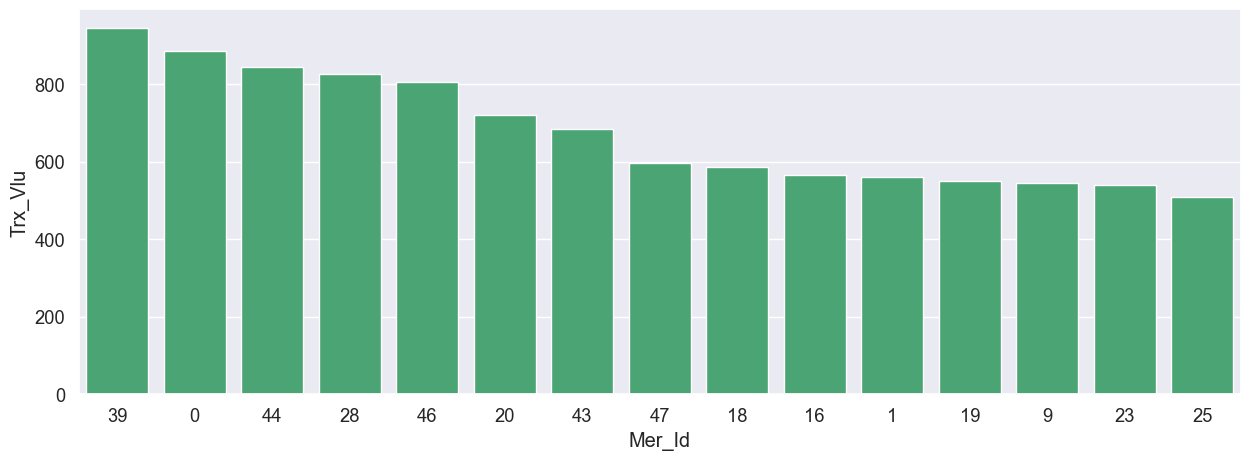

In [1320]:
# Show changes in average of Trx_Vlu over the Mer_Id for the top 15 merchants
plt.figure(figsize=(15, 5))
sns.barplot(x='Mer_Id', y='Trx_Vlu', data=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)], estimator=np.mean, ci=None, color='mediumseagreen', order=df[df['Mer_Id'].isin(df.groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).head(15).index)].groupby('Mer_Id')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Active_User_Merchant', ylabel='Trx_Vlu'>

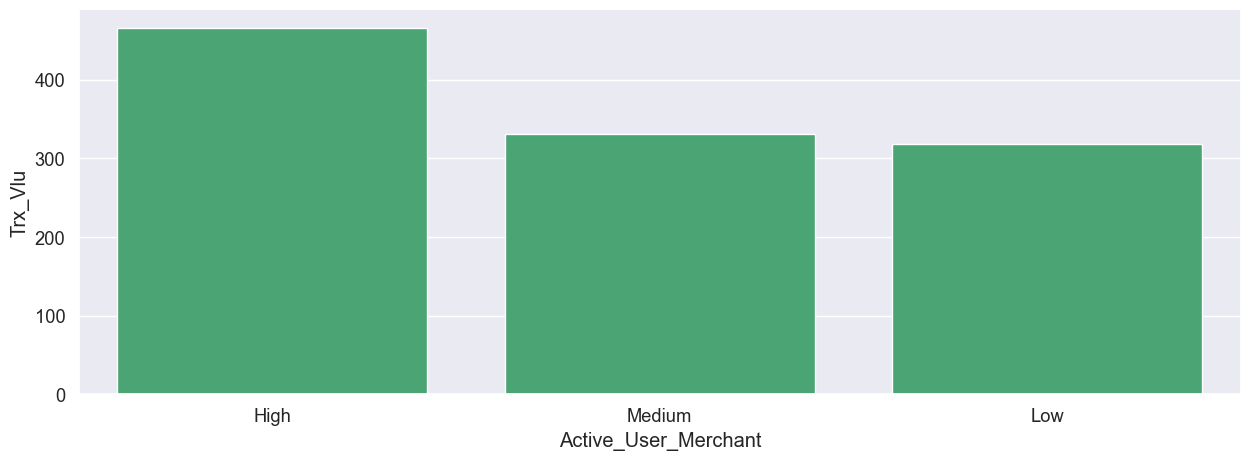

In [1321]:
# Show changes in average of Trx_Vlu over the Active_User_Merchant
plt.figure(figsize=(15, 5))
sns.barplot(x='Active_User_Merchant', y='Trx_Vlu', data=df, estimator=np.mean, ci=None, color='mediumseagreen', order=df.groupby('Active_User_Merchant')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Active_User_Age', ylabel='Trx_Vlu'>

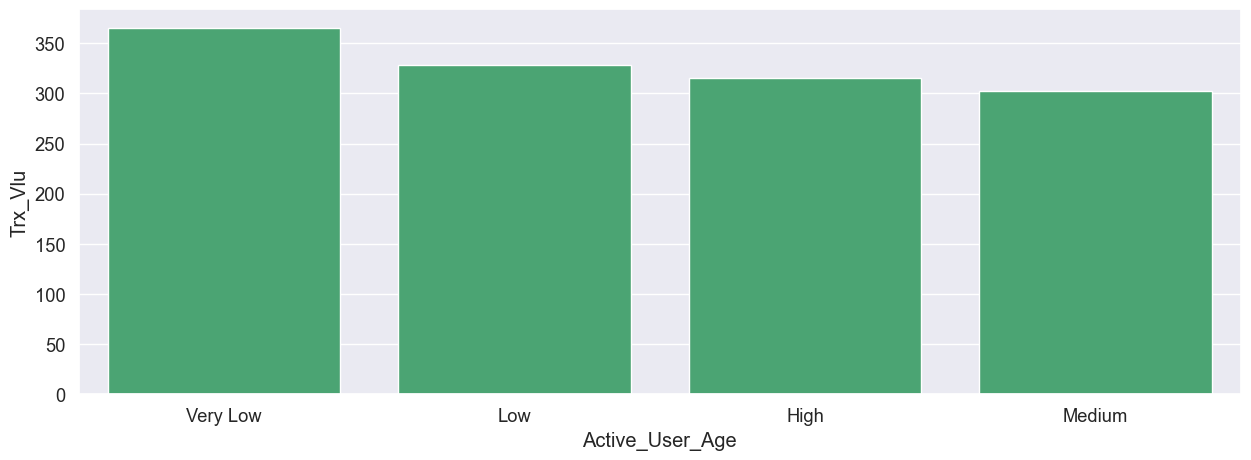

In [1322]:
# Show changes in average of Trx_Vlu over the Active_User_Age
plt.figure(figsize=(15, 5))
sns.barplot(x='Active_User_Age', y='Trx_Vlu', data=df, estimator=np.mean, ci=None, color='mediumseagreen', order=df.groupby('Active_User_Age')['Trx_Vlu'].mean().sort_values(ascending=False).index)

<Axes: xlabel='Customer_Age', ylabel='Density'>

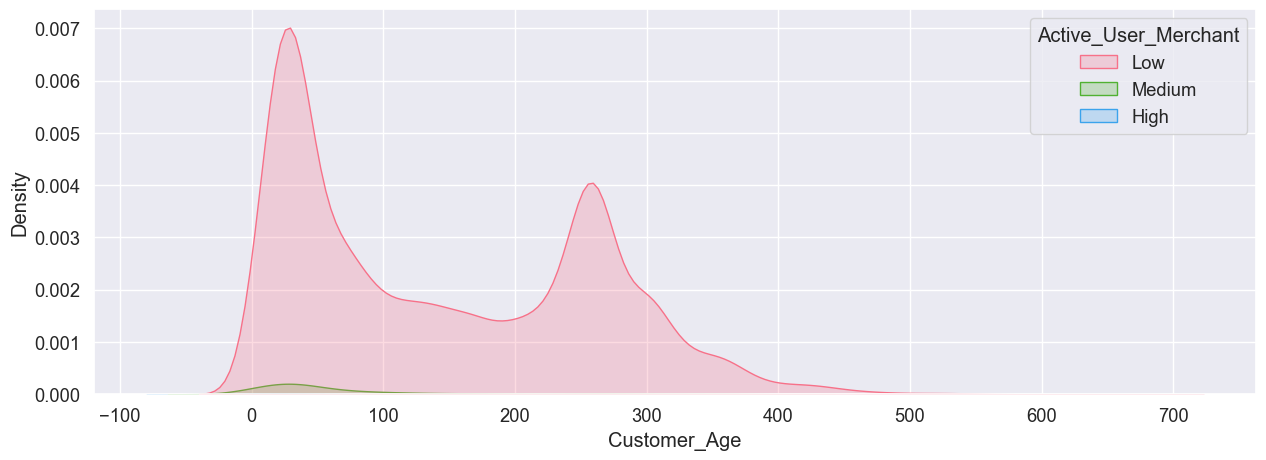

In [1323]:
# Show distribution of Customer_Age over the Active_User_Merchant
plt.figure(figsize=(15, 5)) 
sns.kdeplot(x='Customer_Age', hue='Active_User_Merchant', data=df, fill=True, palette='husl')

<Axes: xlabel='Customer_Age', ylabel='Density'>

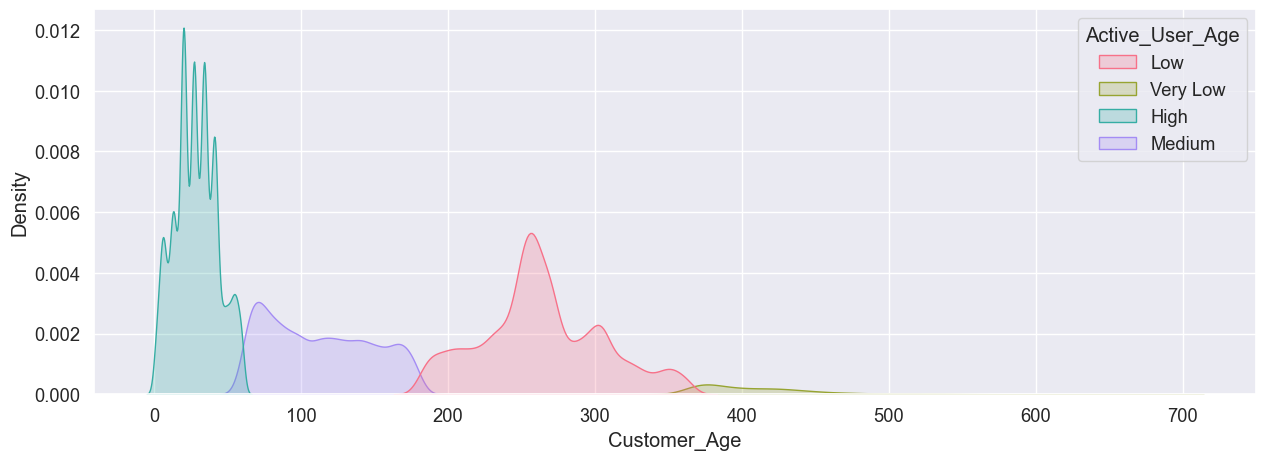

In [1324]:
# Show distribution of Customer_Age over the Active_User_Age
plt.figure(figsize=(15, 5)) 
sns.kdeplot(x='Customer_Age', hue='Active_User_Age', data=df, fill=True, palette='husl')

### Feature Selection:

- Prepare the data for feature selection process

In [1325]:
# Create a copy of the dataframe
df_feature_selection = df.copy()

- Convert categorical columns to numeric

In [1326]:
# Convert Active_User_Merchant column to numeric
df_feature_selection['Active_User_Merchant'] = df_feature_selection['Active_User_Merchant'].map({'High': 2, 'Medium': 1, 'Low': 0})

In [1327]:
# Convert Active_User_Age column to numeric
df_feature_selection['Active_User_Age'] = df_feature_selection['Active_User_Age'].map({'High': 3, 'Medium': 2, 'Low': 1, 'Very Low': 0})

- Get correlations between the features

In [1328]:
features = df_feature_selection[list(df.columns)]

<Axes: >

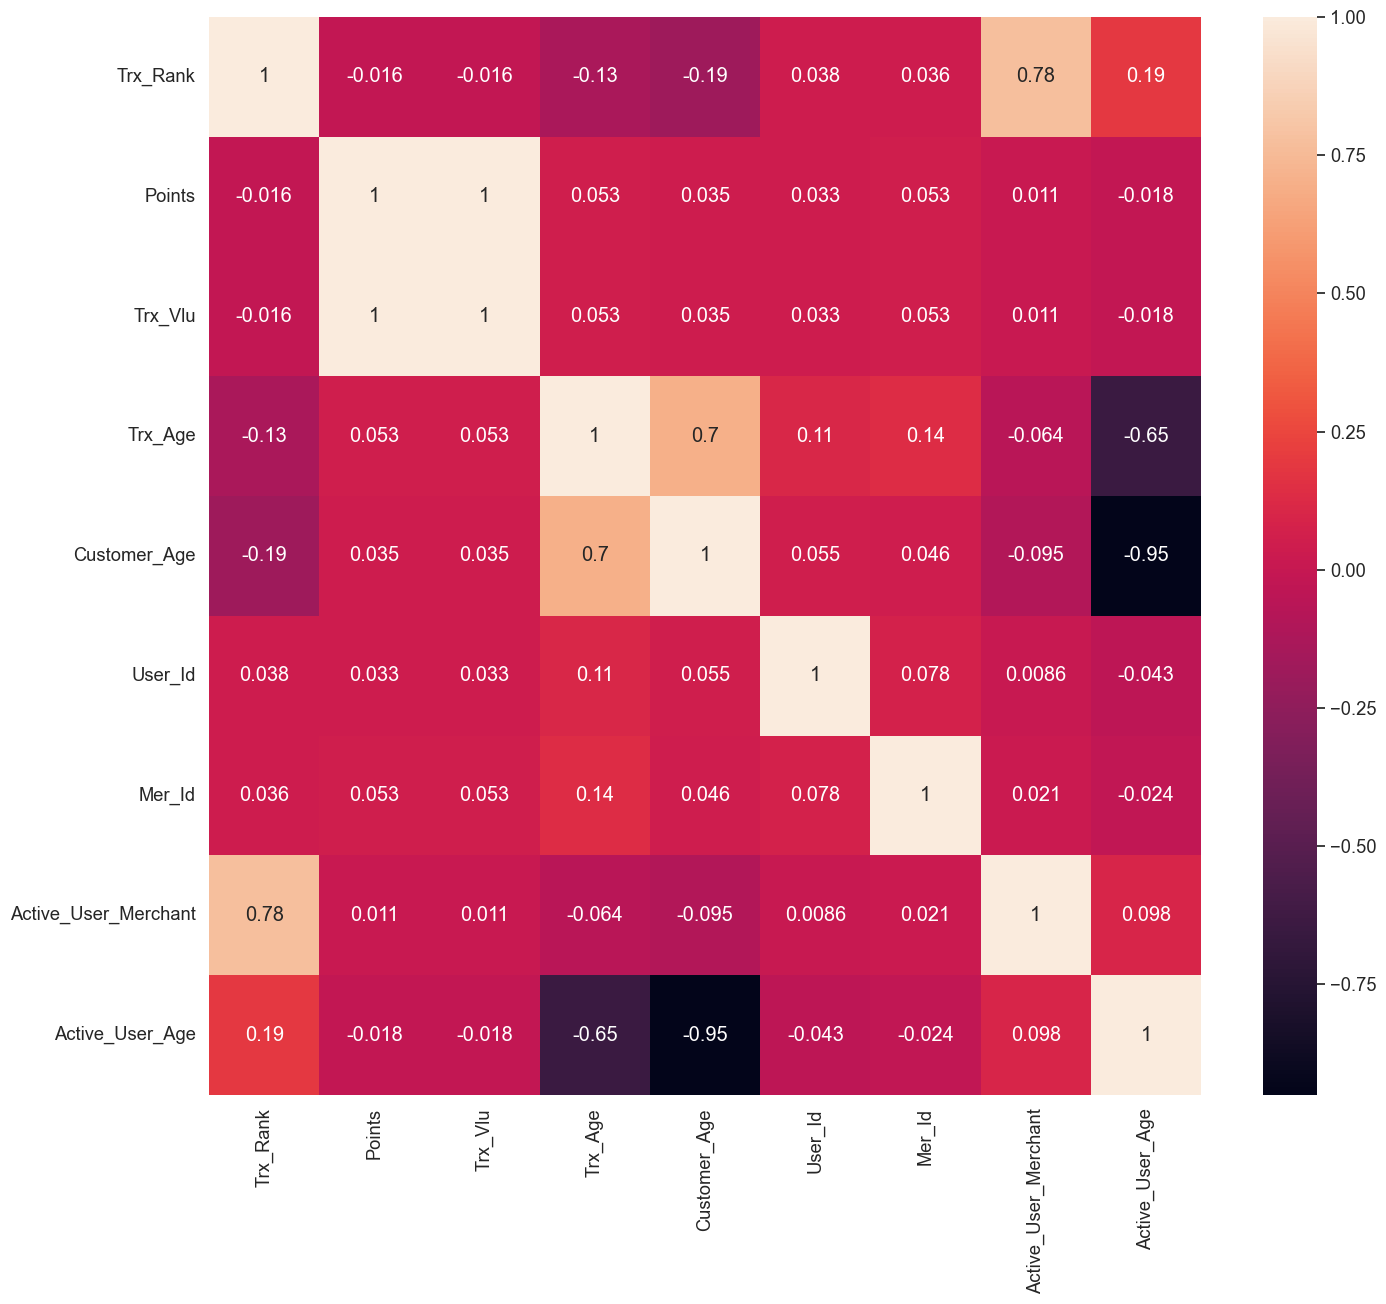

In [1329]:
corr = features.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True)

- Drop `Points` feature

In [1330]:
df.drop(['Points'], axis=1, inplace=True)

- Display data details and types

In [1331]:
df.head()

,Trx_Rank,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Active_User_Merchant,Active_User_Age
0,1,2014.0,362,362,Fashion,21053,0,Low,Low
1,1,1120.0,371,368,Fashion,26472,0,Low,Very Low
2,2,850.0,368,368,Fashion,26472,0,Low,Very Low
3,1,198.0,558,34,Fashion,27075,0,Low,High
4,1,240.0,413,413,Fashion,27417,0,Low,Very Low


In [1332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43605 entries, 0 to 43604
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trx_Rank              43605 non-null  int64  
 1   Trx_Vlu               43605 non-null  float64
 2   Trx_Age               43605 non-null  int64  
 3   Customer_Age          43605 non-null  int64  
 4   Category In English   43605 non-null  object 
 5   User_Id               43605 non-null  int64  
 6   Mer_Id                43605 non-null  int64  
 7   Active_User_Merchant  43605 non-null  object 
 8   Active_User_Age       43605 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 3.0+ MB


In [1333]:
for col in df.columns:
    print(f'Unique values for ({col}): {len(df[col].unique())}')

Unique values for (Trx_Rank): 13
Unique values for (Trx_Vlu): 5859
Unique values for (Trx_Age): 573
Unique values for (Customer_Age): 527
Unique values for (Category In English): 7
Unique values for (User_Id): 33441
Unique values for (Mer_Id): 56
Unique values for (Active_User_Merchant): 3
Unique values for (Active_User_Age): 4


In [1334]:
df.describe()

,Trx_Rank,Trx_Vlu,Trx_Age,Customer_Age,User_Id,Mer_Id
count,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000
mean,1.261140,318.191914,185.260544,144.162092,17179.891526,16.275932
std,0.751224,441.804467,121.997811,114.780214,9667.708179,16.103903
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,122.000000,62.000000,34.000000,8716.000000,8.000000
50%,1.000000,189.000000,203.000000,116.000000,17568.000000,8.000000
75%,1.000000,310.000000,271.000000,252.000000,25649.000000,26.000000
max,13.000000,4996.000000,698.000000,682.000000,33518.000000,56.000000


### Machine Learning Models:

- Clustering (using kmeans)

In [1335]:
# Select the relevant columns for clustering
X = df[['Trx_Rank', 'Trx_Vlu', 'Trx_Age', 'Customer_Age', 'Category In English', 'User_Id', 'Mer_Id', 'Active_User_Merchant', 'Active_User_Age']]

In [1336]:
# Convert Active_User_Merchant column to numeric
X['Active_User_Merchant'] = X['Active_User_Merchant'].map({'High': 2, 'Medium': 1, 'Low': 0})

In [1337]:
# Convert Active_User_Age column to numeric
X['Active_User_Age'] = X['Active_User_Age'].map({'High': 3, 'Medium': 2, 'Low': 1, 'Very Low': 0})

In [1338]:
# Encode categorical columns
X = pd.get_dummies(X, columns=['Category In English'], prefix='Category', drop_first=True, prefix_sep='.')

In [1339]:
# Standardize the numerical columns
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [1340]:
# Determine the optimal number of clusters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

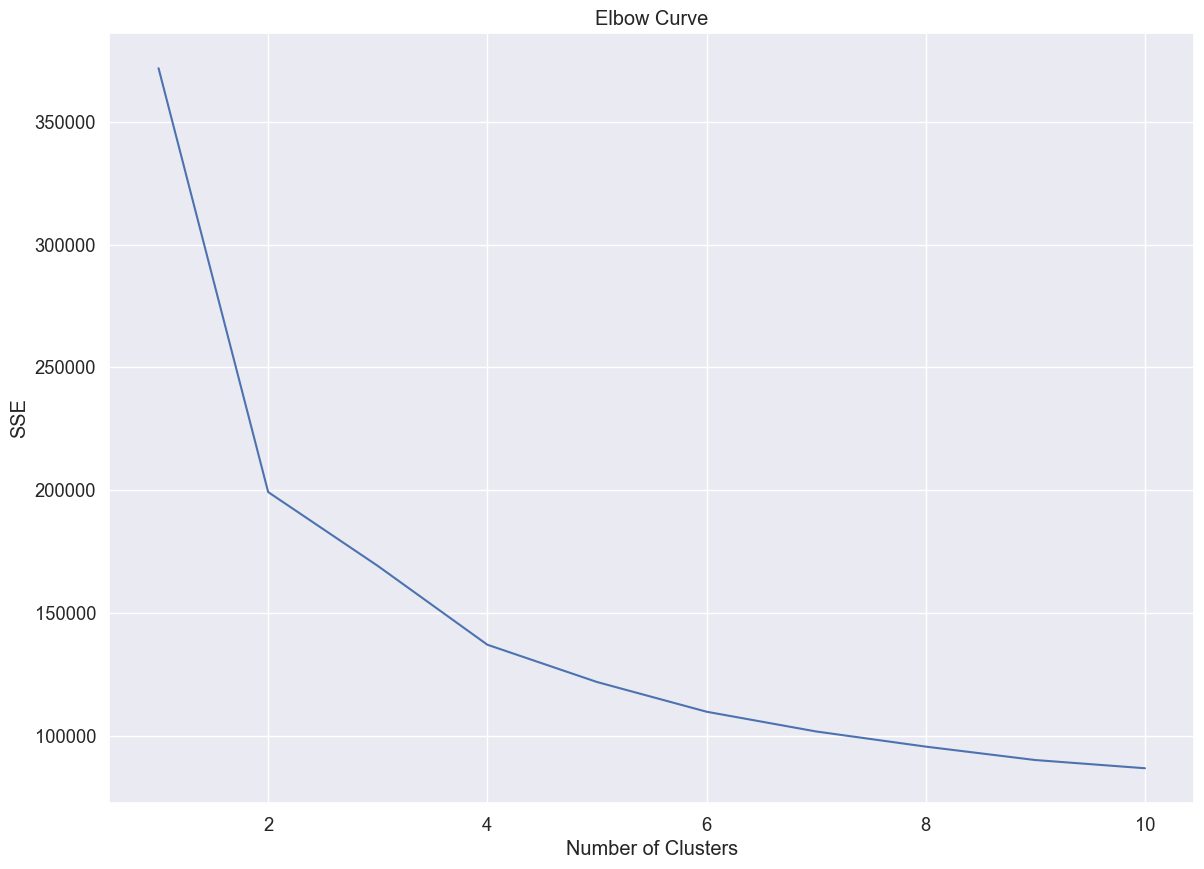

In [1341]:
# Plot the elbow curve to determine the optimal number of clusters
plt.plot(range(1, 11), sse)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [1342]:
# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [1343]:
final_model = kmeans

In [1344]:
# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

- Display data details and types

In [1345]:
df.head()

,Trx_Rank,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Active_User_Merchant,Active_User_Age,Cluster
0,1,2014.0,362,362,Fashion,21053,0,Low,Low,3
1,1,1120.0,371,368,Fashion,26472,0,Low,Very Low,2
2,2,850.0,368,368,Fashion,26472,0,Low,Very Low,2
3,1,198.0,558,34,Fashion,27075,0,Low,High,1
4,1,240.0,413,413,Fashion,27417,0,Low,Very Low,1


In [1346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43605 entries, 0 to 43604
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trx_Rank              43605 non-null  int64  
 1   Trx_Vlu               43605 non-null  float64
 2   Trx_Age               43605 non-null  int64  
 3   Customer_Age          43605 non-null  int64  
 4   Category In English   43605 non-null  object 
 5   User_Id               43605 non-null  int64  
 6   Mer_Id                43605 non-null  int64  
 7   Active_User_Merchant  43605 non-null  object 
 8   Active_User_Age       43605 non-null  object 
 9   Cluster               43605 non-null  int32  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 3.2+ MB


In [1347]:
for col in df.columns:
    print(f'Unique values for ({col}): {len(df[col].unique())}')

Unique values for (Trx_Rank): 13
Unique values for (Trx_Vlu): 5859
Unique values for (Trx_Age): 573
Unique values for (Customer_Age): 527
Unique values for (Category In English): 7
Unique values for (User_Id): 33441
Unique values for (Mer_Id): 56
Unique values for (Active_User_Merchant): 3
Unique values for (Active_User_Age): 4
Unique values for (Cluster): 4


In [1348]:
df.describe()

,Trx_Rank,Trx_Vlu,Trx_Age,Customer_Age,User_Id,Mer_Id,Cluster
count,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000
mean,1.261140,318.191914,185.260544,144.162092,17179.891526,16.275932,0.888384
std,0.751224,441.804467,121.997811,114.780214,9667.708179,16.103903,0.667358
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,122.000000,62.000000,34.000000,8716.000000,8.000000,0.000000
50%,1.000000,189.000000,203.000000,116.000000,17568.000000,8.000000,1.000000
75%,1.000000,310.000000,271.000000,252.000000,25649.000000,26.000000,1.000000
max,13.000000,4996.000000,698.000000,682.000000,33518.000000,56.000000,3.000000


- Visualize the clusters

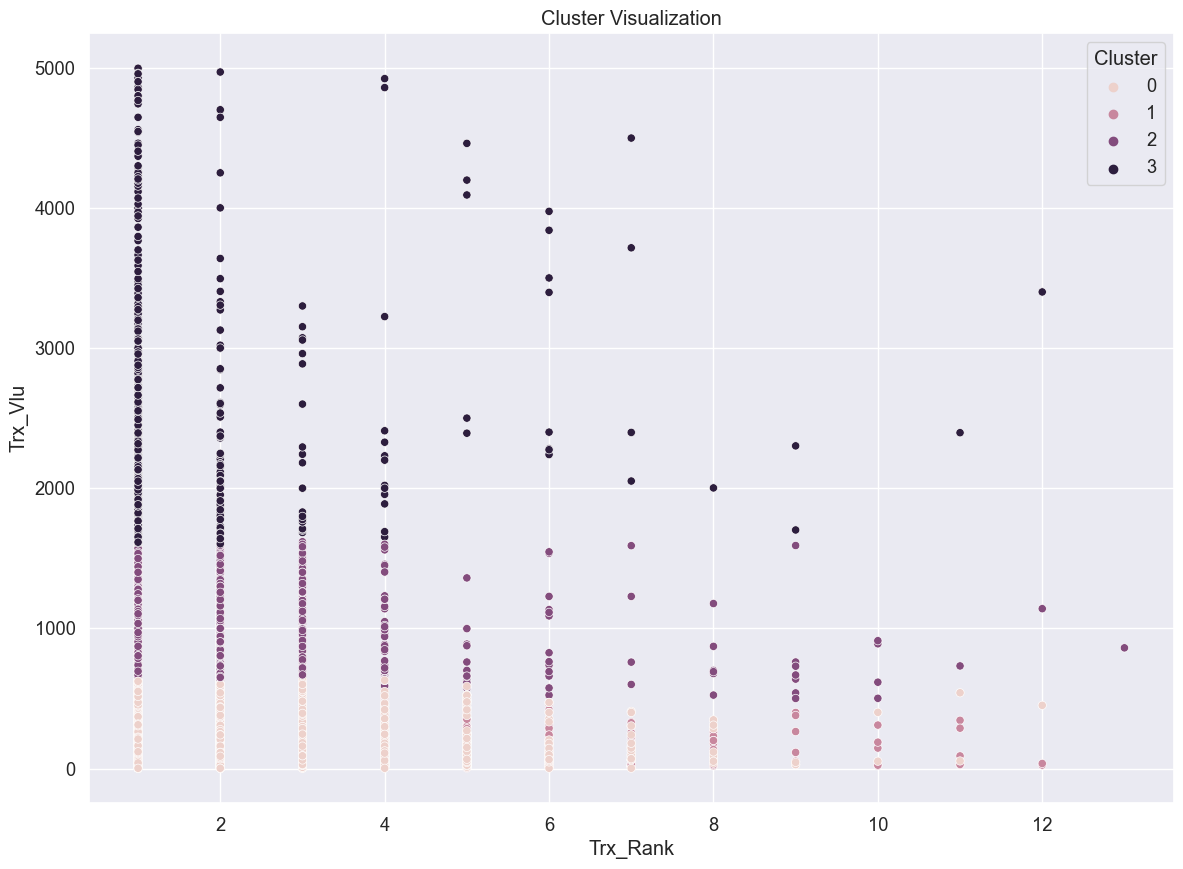

In [1349]:
# Show the correlation between Trx_Rank and Trx_Vlu
sns.scatterplot(x='Trx_Rank', y='Trx_Vlu', hue='Cluster', data=df)
plt.title('Cluster Visualization')
plt.show()

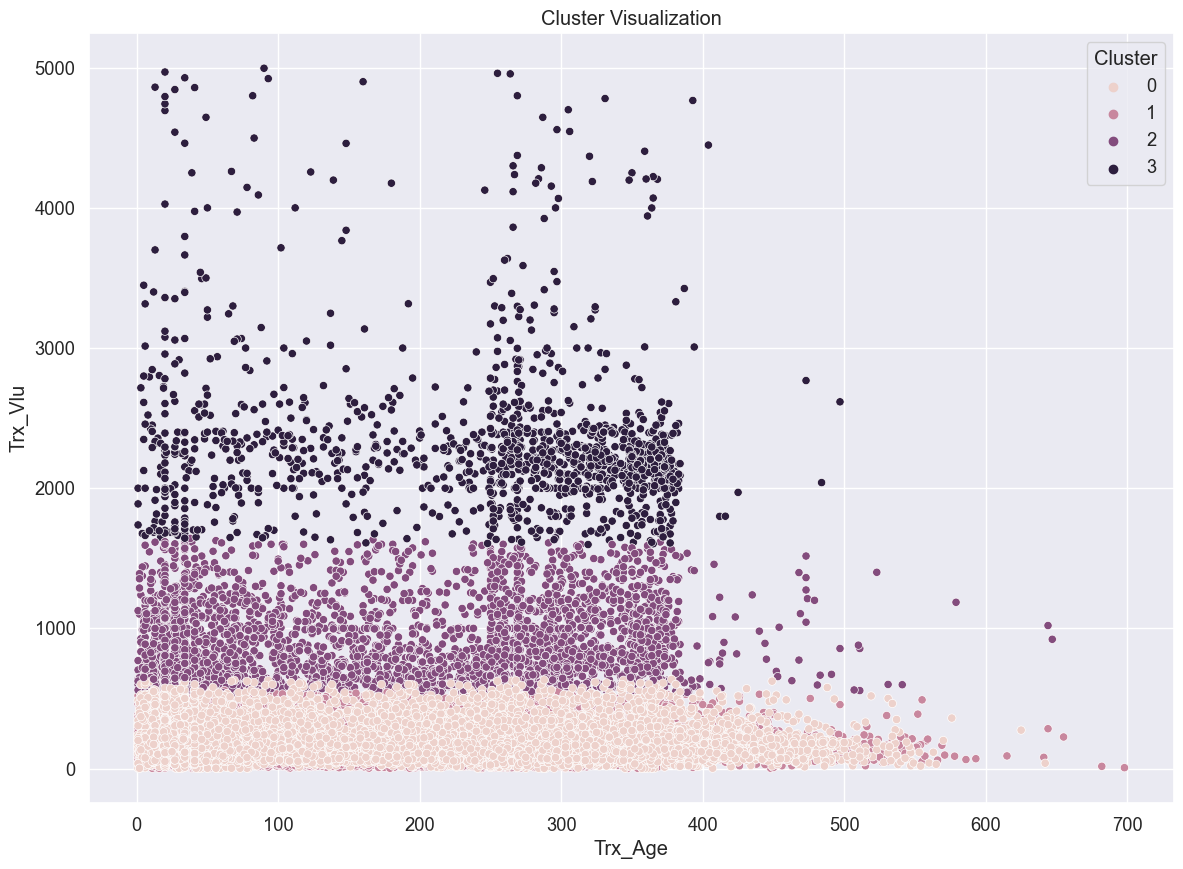

In [1350]:
# Show the correlation between Trx_Age and Trx_Vlu
sns.scatterplot(x='Trx_Age', y='Trx_Vlu', hue='Cluster', data=df)
plt.title('Cluster Visualization')
plt.show()

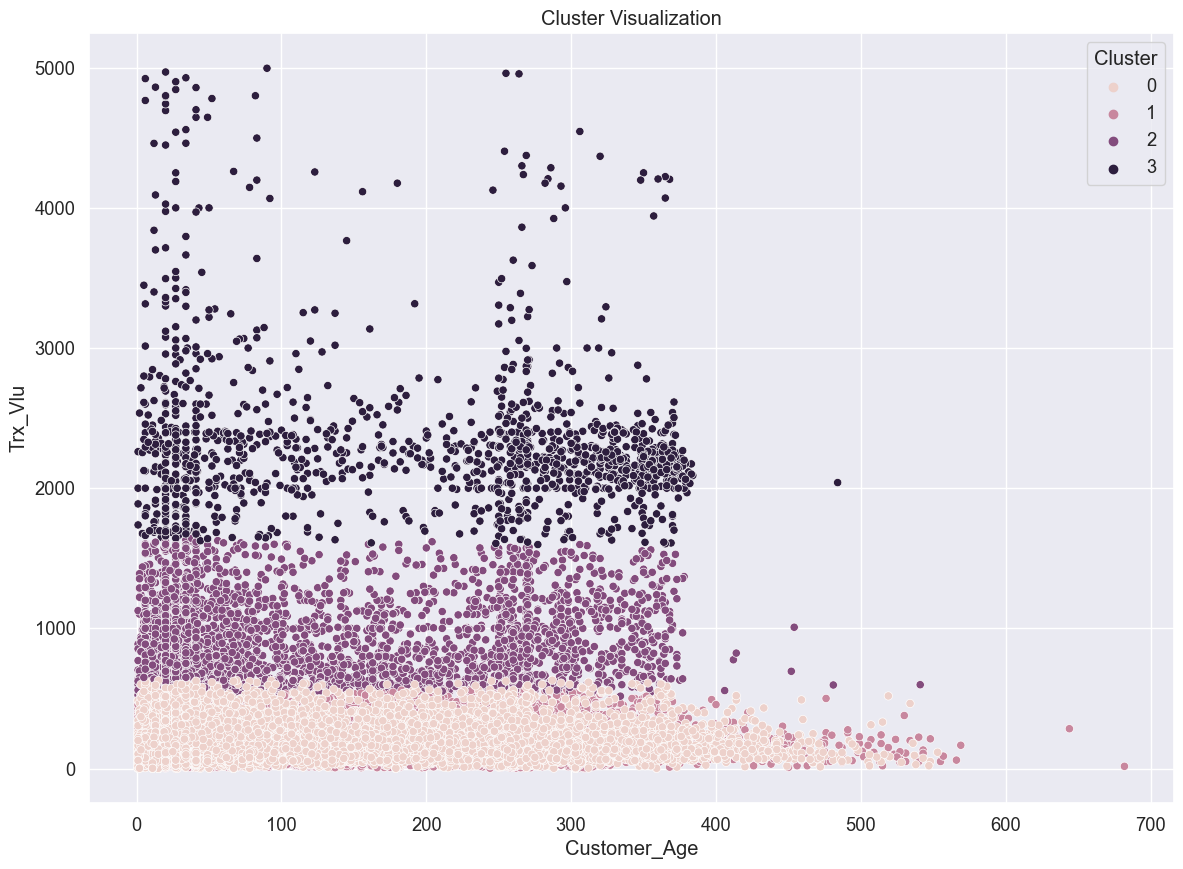

In [1351]:
# Show the correlation between Customer_Age and Trx_Vlu
sns.scatterplot(x='Customer_Age', y='Trx_Vlu', hue='Cluster', data=df)
plt.title('Cluster Visualization')
plt.show()

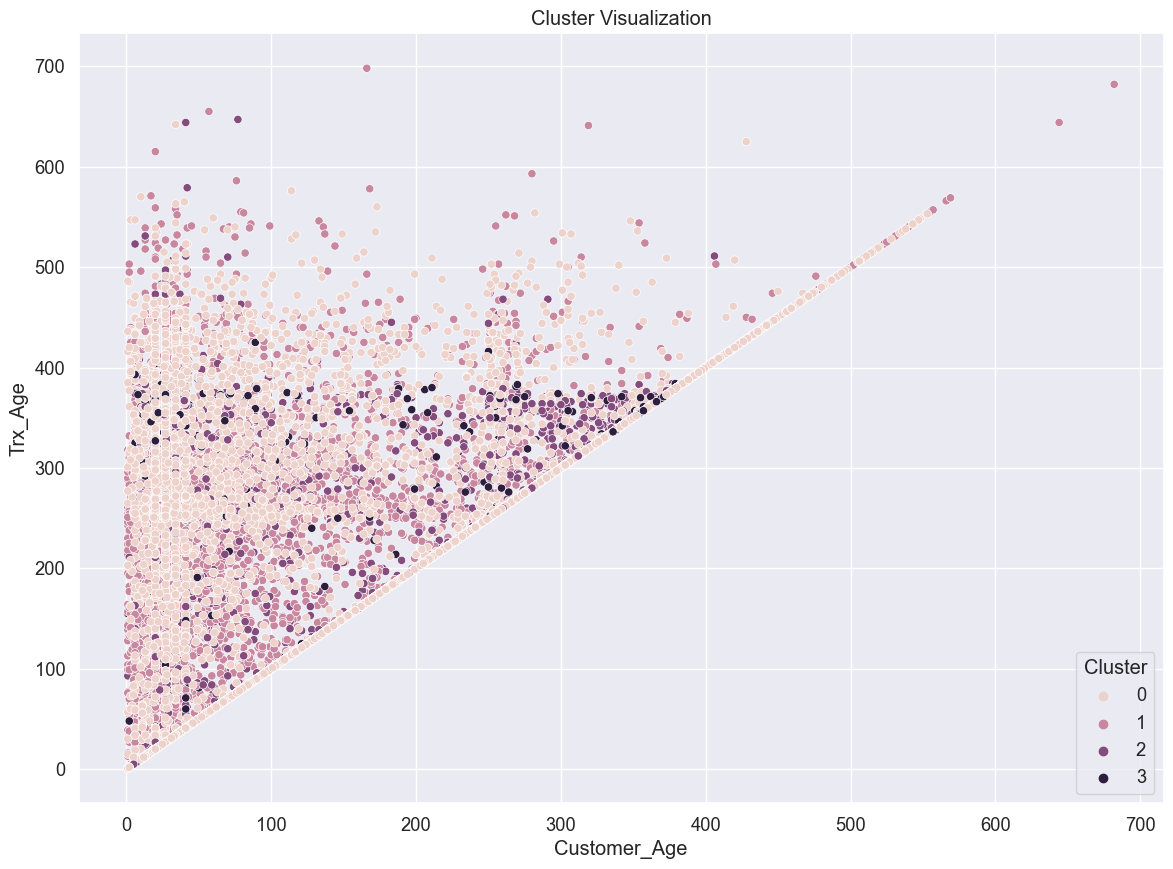

In [1352]:
# Show the correlation between Customer_Age and Trx_Age
sns.scatterplot(x='Customer_Age', y='Trx_Age', hue='Cluster', data=df)
plt.title('Cluster Visualization')
plt.show()

### Deployment:

- Top categories and merchants based on average of `Trx_Vlu`

In [1353]:
# Group the data by cluster and category
grouped_data = df.groupby(['Cluster', 'Category In English'])['Trx_Vlu'].mean()

# Sort the values in descending order and get the top categories for each cluster
for cluster in range(4):
    print(f"Top categories for Cluster {cluster}:")
    top_categories = grouped_data[cluster].sort_values(ascending=False).head(2).index
    print(top_categories)
    print()

Top categories for Cluster 0:
Index(['Electronics', 'Fashion'], dtype='object', name='Category In English')

Top categories for Cluster 1:
Index(['Fashion', 'Other'], dtype='object', name='Category In English')

Top categories for Cluster 2:
Index(['Electronics', 'Fashion'], dtype='object', name='Category In English')

Top categories for Cluster 3:
Index(['Electronics', 'Grocery'], dtype='object', name='Category In English')



In [1354]:
# Group the data by cluster, category and merchant
grouped_data = df.groupby(['Cluster', 'Category In English', 'Mer_Id'])['Trx_Vlu'].mean()

In [1355]:
grouped_data[0]['Electronics'].sort_values(ascending=False).iloc[:1]

Mer_Id
25    308.888889
Name: Trx_Vlu, dtype: float64

In [1356]:
grouped_data[0]['Fashion'].sort_values(ascending=False).iloc[:1]

Mer_Id
47    269.047325
Name: Trx_Vlu, dtype: float64

In [1357]:
grouped_data[1]['Fashion'].sort_values(ascending=False).iloc[:1]

Mer_Id
11    275.444444
Name: Trx_Vlu, dtype: float64

In [1358]:
grouped_data[1]['Other'].sort_values(ascending=False).iloc[:1]

Mer_Id
19    321.666667
Name: Trx_Vlu, dtype: float64

In [1359]:
grouped_data[2]['Electronics'].sort_values(ascending=False).iloc[:1]

Mer_Id
28    1077.65
Name: Trx_Vlu, dtype: float64

In [1360]:
grouped_data[2]['Fashion'].sort_values(ascending=False).iloc[:1]

Mer_Id
47    1046.308824
Name: Trx_Vlu, dtype: float64

In [1361]:
grouped_data[3]['Electronics'].sort_values(ascending=False).iloc[:1]

Mer_Id
28    2816.25
Name: Trx_Vlu, dtype: float64

In [1362]:
grouped_data[3]['Grocery'].sort_values(ascending=False).iloc[:1]

Mer_Id
8    2454.045865
Name: Trx_Vlu, dtype: float64

In [1363]:
# Generate five samples from User_Id
df['User_Id'].sample(5).tolist()

[27363, 22429, 10257, 20251, 16124]

In [1364]:
# Create virtual tester to recommend the top category and merchant for the user based on mean of Trx_Vlu

user_id = int(input('Enter User_Id: '))

if df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 0:
    print('User Cluster is High Spenders with Top Category: Electronics and Second Category: Fashion')
    print('User Cluster is High Spenders with Top Merchant in 1st Category: 25')
    print('User Cluster is High Spenders with Top Merchant in 2nd Category: 47')
elif df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 1:
    print('User Cluster is High Spenders with Top Category: Fashion and Second Category: Other')
    print('User Cluster is High Spenders with Top Merchant in 1st Category: 11')
    print('User Cluster is High Spenders with Top Merchant in 2nd Category: 19')
elif df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 2:
    print('User Cluster is High Spenders with Top Category: Electronics and Second Category: Fashion')
    print('User Cluster is High Spenders with Top Merchant in 1st Category: 28')
    print('User Cluster is High Spenders with Top Merchant in 2nd Category: 47')
elif df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 3:
    print('User Cluster is High Spenders with Top Category: Electronics and Second Category: Grocery')
    print('User Cluster is High Spenders with Top Merchant in 1st Category: 28')
    print('User Cluster is High Spenders with Top Merchant in 2nd Category: 8')

User Cluster is High Spenders with Top Category: Fashion and Second Category: Other
User Cluster is High Spenders with Top Merchant in 1st Category: 11
User Cluster is High Spenders with Top Merchant in 2nd Category: 19


- Top categories and merchants based on count of `Trx_Rank`

In [1365]:
# Group the data by cluster and category
grouped_data = df.groupby(['Cluster', 'Category In English'])['Trx_Rank'].count()

# Sort the values in descending order and get the top categories for each cluster
for cluster in range(4):
    print(f"Top categories for Cluster {cluster}:")
    top_categories = grouped_data[cluster].sort_values(ascending=False).head(2).index
    print(top_categories)
    print()

Top categories for Cluster 0:
Index(['Grocery', 'F&B'], dtype='object', name='Category In English')

Top categories for Cluster 1:
Index(['Grocery', 'F&B'], dtype='object', name='Category In English')

Top categories for Cluster 2:
Index(['Grocery', 'F&B'], dtype='object', name='Category In English')

Top categories for Cluster 3:
Index(['Grocery', 'Fashion'], dtype='object', name='Category In English')



In [1366]:
# Group the data by cluster, category and merchant
grouped_data = df.groupby(['Cluster', 'Category In English', 'Mer_Id'])['Trx_Vlu'].mean()

In [1367]:
grouped_data[0]['Grocery'].sort_values(ascending=False).iloc[:1]

Mer_Id
36    189.333333
Name: Trx_Vlu, dtype: float64

In [1368]:
grouped_data[0]['F&B'].sort_values(ascending=False).iloc[:1]

Mer_Id
53    318.5
Name: Trx_Vlu, dtype: float64

In [1369]:
grouped_data[1]['Grocery'].sort_values(ascending=False).iloc[:1]

Mer_Id
8    195.624299
Name: Trx_Vlu, dtype: float64

In [1370]:
grouped_data[1]['F&B'].sort_values(ascending=False).iloc[:1]

Mer_Id
1    266.35
Name: Trx_Vlu, dtype: float64

In [1371]:
grouped_data[2]['Grocery'].sort_values(ascending=False).iloc[:1]

Mer_Id
31    1070.0
Name: Trx_Vlu, dtype: float64

In [1372]:
grouped_data[2]['F&B'].sort_values(ascending=False).iloc[:1]

Mer_Id
20    1438.0
Name: Trx_Vlu, dtype: float64

In [1373]:
grouped_data[3]['Grocery'].sort_values(ascending=False).iloc[:1]

Mer_Id
8    2454.045865
Name: Trx_Vlu, dtype: float64

In [1374]:
grouped_data[3]['Fashion'].sort_values(ascending=False).iloc[:1]

Mer_Id
47    2551.0
Name: Trx_Vlu, dtype: float64

In [1375]:
# Generate five samples from User_Id
df['User_Id'].sample(5).tolist()

[26907, 26381, 17370, 25402, 6240]

In [1376]:
# Create virtual tester to recommend the top category and merchant for the user based on count of Trx_Rank

user_id = int(input('Enter User_Id: '))

if df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 0:
    print('User Cluster is Frequent Purchaseres with Top Category: Grocery and Second Category: F&B')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 1st Category: 36')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 2nd Category: 53')
elif df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 1:
    print('User Cluster is Frequent Purchaseres with Top Category: Grocery and Second Category: F&B')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 1st Category: 8')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 2nd Category: 1')
elif df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 2:
    print('User Cluster is Frequent Purchaseres with Top Category: Grocery and Second Category: F&B')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 1st Category: 31')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 2nd Category: 20')
elif df[df['User_Id'] == user_id]['Cluster'].iloc[0] == 3:
    print('User Cluster is Frequent Purchaseres with Top Category: Grocery and Second Category: Fashion')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 1st Category: 8')
    print('User Cluster is Frequent Purchaseres with Top Merchant in 2nd Category: 47')

User Cluster is Frequent Purchaseres with Top Category: Grocery and Second Category: F&B
User Cluster is Frequent Purchaseres with Top Merchant in 1st Category: 36
User Cluster is Frequent Purchaseres with Top Merchant in 2nd Category: 53


In [1380]:
# Save the dataframe to csv file
df.to_csv('Merchant Level (Deployment).csv', index=False)